# Convolutional Neural Network

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

plt.gray()

<Figure size 640x480 with 0 Axes>

In [2]:
print(f"TensorFlow version: {tf.__version__}")
print(f"Available GPUs: {tf.config.list_physical_devices('GPU')}")

TensorFlow version: 2.15.0
Available GPUs: []


## 0 Helper function

In [3]:
def relu(x):
    return np.max([0.0,x])

In [4]:
def linear(x):
    return x

In [5]:
def conv(pic,conv_matrix,af=linear,bias=None):
    size_x_conv = conv_matrix.shape[0]
    size_y_conv = conv_matrix.shape[1]

    num_filters = conv_matrix.shape[2]
    
    len_x = pic.shape[0]-size_x_conv+1
    len_y = pic.shape[1]-size_y_conv+1

    num_lines = int(np.ceil(num_filters/10))

    fig = plt.figure(figsize=(20,num_lines*1.5))

    if bias is None:
        bias = np.zeros(num_filters)
    
    nplt = 1
    for f in range(num_filters):
        pic_conv = np.zeros((len_x,len_y))

        for i in range(len_x):
            for j in range(len_y):
                pic_conv[i,j] = af((pic[i:i+size_x_conv,j:j+size_y_conv]*conv_matrix[:,:,f]).sum()+bias[f])
            
        ax = fig.add_subplot(num_lines,10,nplt)
        ax.axis('off')
        ax.set_title(str(f))

        plt.imshow(pic_conv)
        nplt += 1
    return

In [1]:
def plot_samples(xdata,ydata,amount=40):
    for number in range(10):
        indeces = np.random.choice(np.where(ydata == number)[0],size=amount,replace=False)
        fig = plt.figure(figsize=(20,6))
        fig.suptitle("examples for number "+str(number)+":")
        nplt = 1
        for index in indeces:
            ax = fig.add_subplot(4,10,nplt)
            ax.axis('off')
            plt.imshow(xdata[index])
            nplt += 1
    

In [7]:
def rotate_image(image, rotation_angle=0, scale=1):
    height, width = image.shape
    M = cv.getRotationMatrix2D(((width - 1) / 2.0, (height - 1) / 2.0),
                               rotation_angle, scale)
    image_rotated = cv.warpAffine(np.squeeze(image), M, (width, height))

    return image_rotated

## 1 MNIST dataset

In [8]:
mnist = tf.keras.datasets.mnist

In [9]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

Normalizing the data:

In [10]:
x_train = x_train / 255
x_test = x_test / 255

## 2 Building and Testing a CNN

### 2.1 A simple CNN

#### 2.1.1 Training

In [12]:
def create_simple_model():
    model = tf.keras.models.Sequential()
    
    # feature extraction
    model.add(keras.layers.Conv2D(filters=32,
                    kernel_size=(3,3),
                    activation="relu",
                    input_shape=(28,28,1)))

    model.add(keras.layers.MaxPooling2D(pool_size=(3,3)))

    # Classification
    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(units=64, activation="relu"))

    # output layer
    model.add(keras.layers.Dense(units=10, activation="softmax"))

    model.summary()

    model.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])
    
    return model

In [13]:
tf.keras.backend.clear_session()
model1 = create_simple_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 32)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 132106 (516.04 KB)
Trainable params: 132106 (516.04 KB)
Non-trainable params: 0 (0.00 Byte)
________________

Test different batch_sizes:

In [14]:
tf.keras.backend.clear_session()
model1 = create_simple_model()
model1.fit(x_train,y_train,batch_size=8,epochs=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 32)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 132106 (516.04 KB)
Trainable params: 132106 (516.04 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [15]:
tf.keras.backend.clear_session()
model1 = create_simple_model()
model1.fit(x_train,y_train,batch_size=16,epochs=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 32)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 132106 (516.04 KB)
Trainable params: 132106 (516.04 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [13]:
tf.keras.backend.clear_session()
model1 = create_simple_model()
model1.fit(x_train,y_train,batch_size=32,epochs=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 32)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 132106 (516.04 KB)
Trainable params: 132106 (516.04 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [17]:
tf.keras.backend.clear_session()
model1 = create_simple_model()
model1.fit(x_train,y_train,batch_size=64,epochs=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 32)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 132106 (516.04 KB)
Trainable params: 132106 (516.04 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [18]:
tf.keras.backend.clear_session()
model1 = create_simple_model()
model1.fit(x_train,y_train,batch_size=128,epochs=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 32)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 132106 (516.04 KB)
Trainable params: 132106 (516.04 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [19]:
tf.keras.backend.clear_session()
model1 = create_simple_model()
model1.fit(x_train,y_train,batch_size=256,epochs=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 32)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 132106 (516.04 KB)
Trainable params: 132106 (516.04 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [20]:
tf.keras.backend.clear_session()
model1 = create_simple_model()
model1.fit(x_train,y_train,batch_size=512,epochs=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 32)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 132106 (516.04 KB)
Trainable params: 132106 (516.04 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [21]:
tf.keras.backend.clear_session()
model1 = create_simple_model()
model1.fit(x_train,y_train,batch_size=1024,epochs=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 32)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 132106 (516.04 KB)
Trainable params: 132106 (516.04 KB)
Non-trainable params: 0 (0.00 Byte)
________________

Thus, we can see a good compromise might be a batch size of 32 or 64. Can depend on the hardware.

In [17]:
model1 = create_simple_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                131136    
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 132106 (516.04 KB)
Trainable params: 132106 (516.04 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [18]:
model1.fit(x_train,y_train,batch_size=64,epochs=10)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2337 - accuracy: 0.9323
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0756 - accuracy: 0.9772
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0543 - accuracy: 0.9841
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0422 - accuracy: 0.9869
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0350 - accuracy: 0.9896
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0282 - accuracy: 0.9915
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0242 - accuracy: 0.9924
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0187 - accuracy: 0.9945
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0155 - accuracy: 0.9952
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0130 - accuracy: 0.9961

Evaluate on test data:

In [19]:
model1.evaluate(x_test,y_test)

313/313 [==============================] - 0s 964us/step - loss: 0.0489 - accuracy: 0.9870


[0.0489264540374279, 0.9869999885559082]

"misusing" test data for validation:

In [20]:
for i in range(10):
    model1.fit(x_train,y_train,batch_size=64,epochs=1)
    model1.evaluate(x_test,y_test)
    print(" ")

313/313 [==============================] - 0s 891us/step - loss: 0.0434 - accuracy: 0.9885
 
313/313 [==============================] - 0s 861us/step - loss: 0.0409 - accuracy: 0.9883
 
313/313 [==============================] - 0s 854us/step - loss: 0.0478 - accuracy: 0.9867
 
313/313 [==============================] - 0s 889us/step - loss: 0.0590 - accuracy: 0.9844
 
313/313 [==============================] - 0s 851us/step - loss: 0.0484 - accuracy: 0.9883
 
313/313 [==============================] - 0s 875us/step - loss: 0.0482 - accuracy: 0.9887
 
313/313 [==============================] - 0s 933us/step - loss: 0.0490 - accuracy: 0.9881
 
313/313 [==============================] - 0s 862us/step - loss: 0.0520 - accuracy: 0.9880
 
313/313 [==============================] - 0s 903us/step - loss: 0.0475 - accuracy: 0.9884
 
313/313 [==============================] - 0s 952us/step - loss: 0.0492 - accuracy: 0.9892
 


Thus, even the loss for the training data is decreasing but the loss on the test data is not getting better and might be even worse, which might be due to overfitting. Consequently, it is more useful to use a validation data set to stop learning when the loss on the validation data is getting worse.

Now with validation included within the fit method. This means a part of the data will be used for validation to check convergence and in order to pretend overfitting.

In [21]:
model2 = create_simple_model()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                131136    
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 132106 (516.04 KB)
Trainable params: 132106 (516.04 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [22]:
model2.fit(x_train,y_train,batch_size=64,epochs=10,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.2735 - accuracy: 0.9199 - val_loss: 0.1075 - val_accuracy: 0.9680
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0858 - accuracy: 0.9743 - val_loss: 0.0813 - val_accuracy: 0.9747
Epoch 3/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0616 - accuracy: 0.9814 - val_loss: 0.0685 - val_accuracy: 0.9791
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0502 - accuracy: 0.9841 - val_loss: 0.0574 - val_accuracy: 0.9818
Epoch 5/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0403 - accuracy: 0.9881 - val_loss: 0.0716 - val_accuracy: 0.9792
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0338 - accuracy: 0.9893 - val_loss: 0.0553 - val_accuracy: 0.9833
Epoch 7/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0284 - accuracy: 0.9910 - val_loss: 0.0605 - val_accuracy: 0.9831
Epoch 

In [23]:
model2.fit(x_train,y_train,batch_size=64,epochs=10,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0131 - accuracy: 0.9960 - val_loss: 0.0524 - val_accuracy: 0.9858
Epoch 2/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0110 - accuracy: 0.9968 - val_loss: 0.0590 - val_accuracy: 0.9851
Epoch 3/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0602 - val_accuracy: 0.9847
Epoch 4/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.0576 - val_accuracy: 0.9864
Epoch 5/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0608 - val_accuracy: 0.9859
Epoch 6/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0082 - accuracy: 0.9975 - val_loss: 0.0606 - val_accuracy: 0.9863
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0655 - val_accuracy: 0.9858
Epoch 

In [24]:
model2.fit(x_train,y_train,batch_size=64,epochs=10,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0669 - val_accuracy: 0.9865
Epoch 2/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0688 - val_accuracy: 0.9884
Epoch 3/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0742 - val_accuracy: 0.9836
Epoch 4/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.0733 - val_accuracy: 0.9859
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0710 - val_accuracy: 0.9875
Epoch 6/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0745 - val_accuracy: 0.9865
Epoch 7/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.0745 - val_accuracy: 0.9861
Epoch 

In [25]:
model2.fit(x_train,y_train,batch_size=64,epochs=10,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 3s 4ms/step - loss: 9.0901e-05 - accuracy: 1.0000 - val_loss: 0.0741 - val_accuracy: 0.9884
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 7.4765e-05 - accuracy: 1.0000 - val_loss: 0.0780 - val_accuracy: 0.9877
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0996 - val_accuracy: 0.9829
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.0707 - val_accuracy: 0.9871
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 5.0495e-04 - accuracy: 0.9999 - val_loss: 0.0709 - val_accuracy: 0.9875
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 1.7672e-04 - accuracy: 1.0000 - val_loss: 0.0742 - val_accuracy: 0.9877
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 7.6670e-05 - accuracy: 1.0000 - val_loss: 0.0745 - val_acc

look at the whole training data:

In [26]:
model2.evaluate(x_train,y_train)

1875/1875 [==============================] - 2s 945us/step - loss: 0.0159 - accuracy: 0.9977


[0.015906546264886856, 0.9977333545684814]

We can see, that the accuracy is decreasing at the end, because there is the validation data set used during the fit.

just look at the test data:

In [27]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0682 - accuracy: 0.9892


[0.0682368129491806, 0.9891999959945679]

**Note:** due to time constraints we are not doing a full converged training throughout the notebook.

Now, we can save the final model for later use:

In [28]:
model2.save('model_simple')

INFO:tensorflow:Assets written to: model_simple/assets


INFO:tensorflow:Assets written to: model_simple/assets


A model can be loaded with:

model_load = keras.models.load_model('model_drop')

#### 2.1.2 Analyze wrong data

##### look at false categorized numbers for training data:

In [29]:
pred_train = model2.predict(x_train)

1875/1875 [==============================] - 1s 750us/step


In [30]:
wrong = [i for i in range(len(pred_train))  
         if pred_train[i].argmax() != y_train[i]]
print("number of wrong numbers:",len(wrong),". That is ",
      len(wrong)/len(pred_train)*100,"% of the data.")

number of wrong numbers: 136 . That is  0.22666666666666668 % of the data.


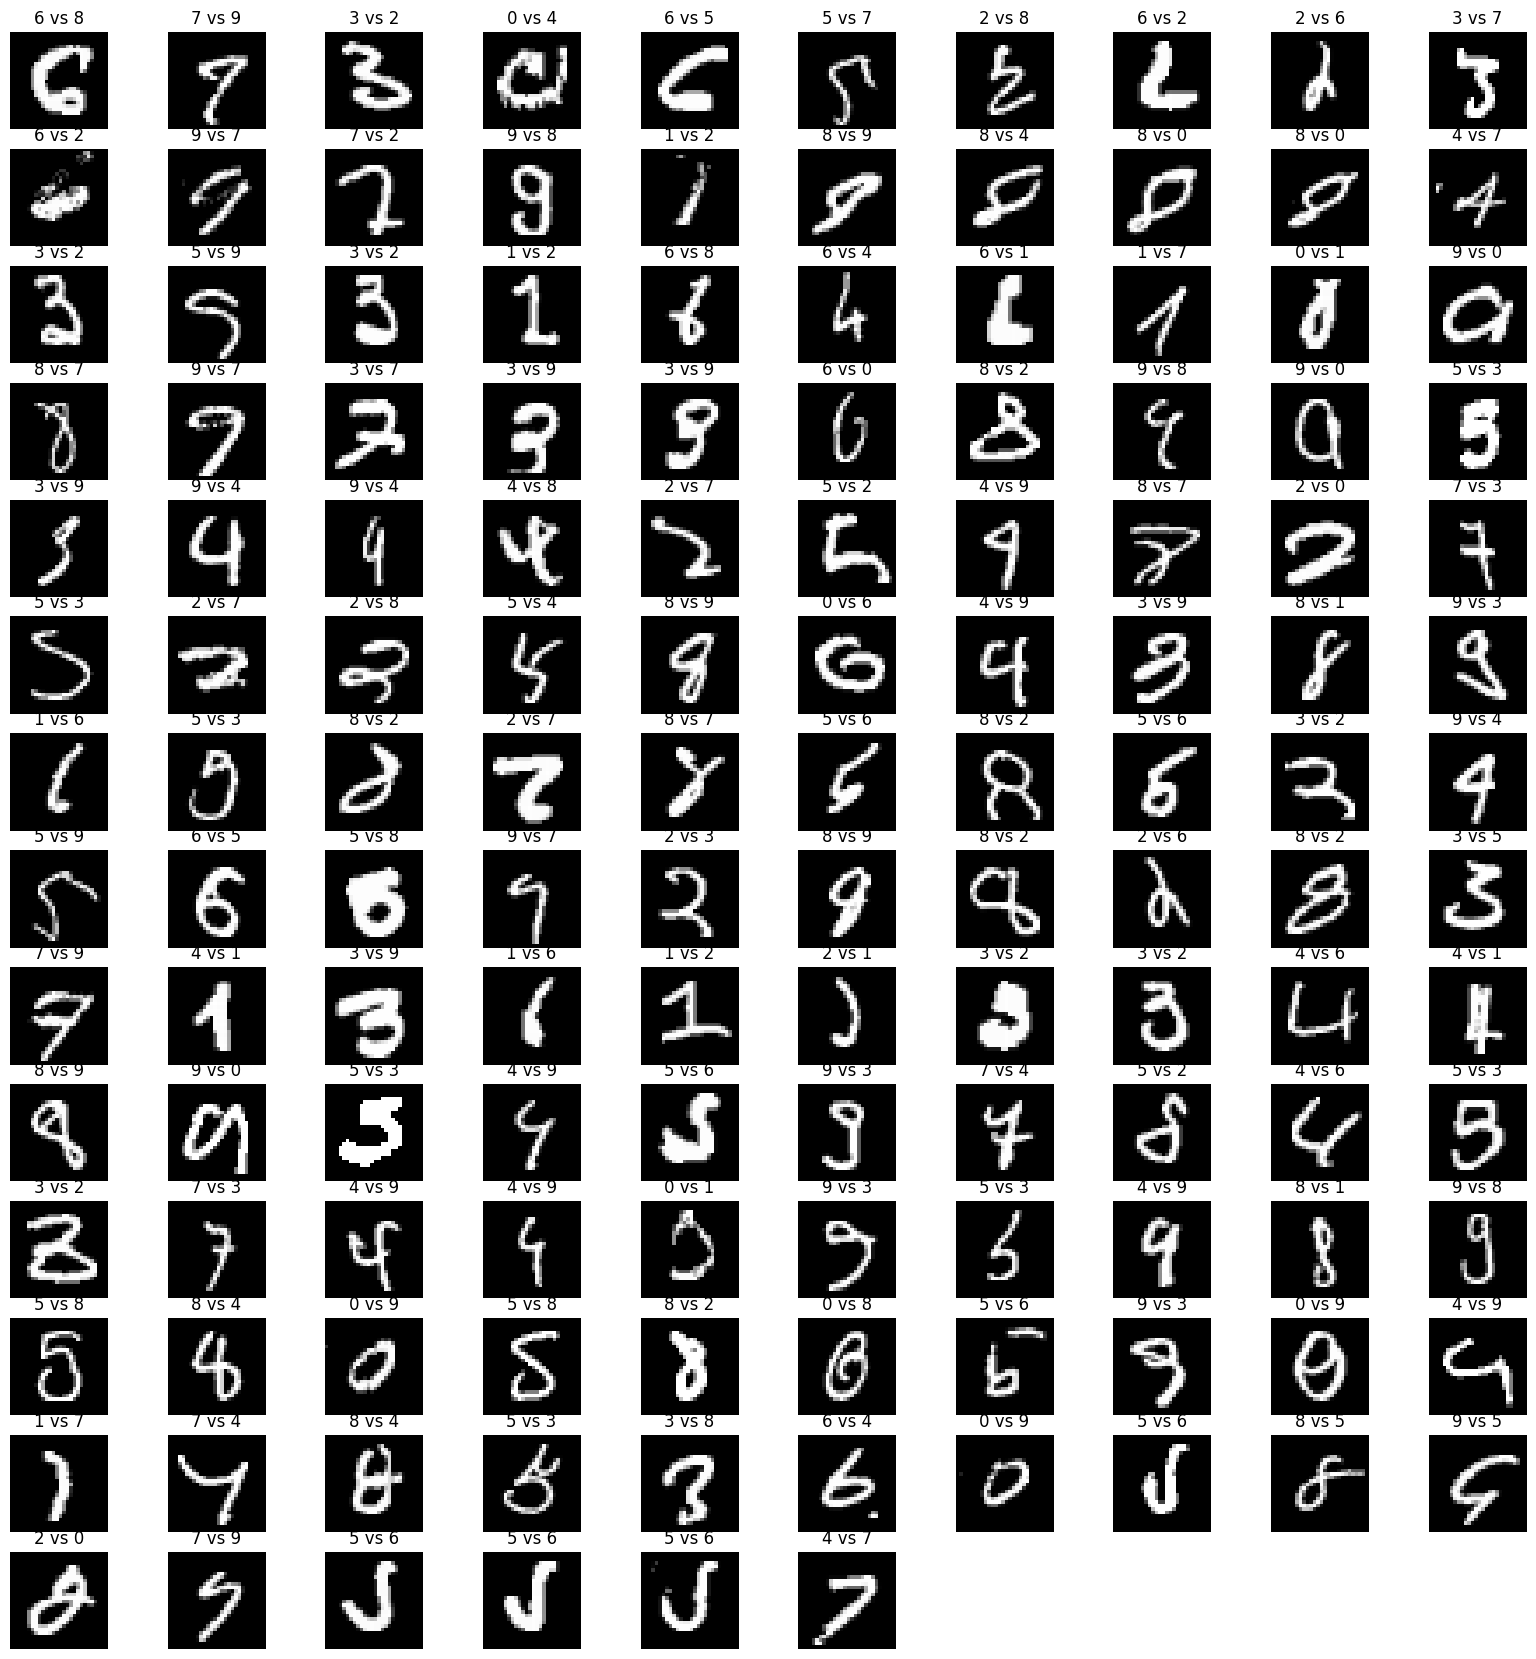

In [31]:
nsub = int(np.ceil(len(wrong)/10))

fig = plt.figure(figsize=(20,nsub*1.5))

nplt = 1

for index in wrong:
    ax = fig.add_subplot(nsub,10,nplt)
    ax.axis('off')
    ax.set_title(str(y_train[index])+' vs '+
                 str(pred_train[index].argmax()))
    plt.imshow(x_train[index])
    nplt += 1


look at the distrubtion:

In [32]:
for index in wrong:
    print(f"label: {y_train[index]:1}  prediction: {pred_train[index].argmax():1}",
          f"with max= {pred_train[index].max():.4f}",
          f"and 2nd largest: {np.sort(pred_train[index])[-2]:.4f}")

label: 6  prediction: 8 with max= 0.5896 and 2nd largest: 0.3992
label: 7  prediction: 9 with max= 0.9847 and 2nd largest: 0.0151
label: 3  prediction: 2 with max= 0.9983 and 2nd largest: 0.0017
label: 0  prediction: 4 with max= 0.9620 and 2nd largest: 0.0380
label: 6  prediction: 5 with max= 0.9951 and 2nd largest: 0.0049
label: 5  prediction: 7 with max= 0.6922 and 2nd largest: 0.3075
label: 2  prediction: 8 with max= 0.7354 and 2nd largest: 0.1321
label: 6  prediction: 2 with max= 1.0000 and 2nd largest: 0.0000
label: 2  prediction: 6 with max= 0.9627 and 2nd largest: 0.0338
label: 3  prediction: 7 with max= 0.8684 and 2nd largest: 0.1316
label: 6  prediction: 2 with max= 0.9324 and 2nd largest: 0.0676
label: 9  prediction: 7 with max= 0.9947 and 2nd largest: 0.0051
label: 7  prediction: 2 with max= 1.0000 and 2nd largest: 0.0000
label: 9  prediction: 8 with max= 0.9491 and 2nd largest: 0.0449
label: 1  prediction: 2 with max= 0.8787 and 2nd largest: 0.1210
label: 8  prediction: 9 w

now look at pictures again with 2nd largest alternative

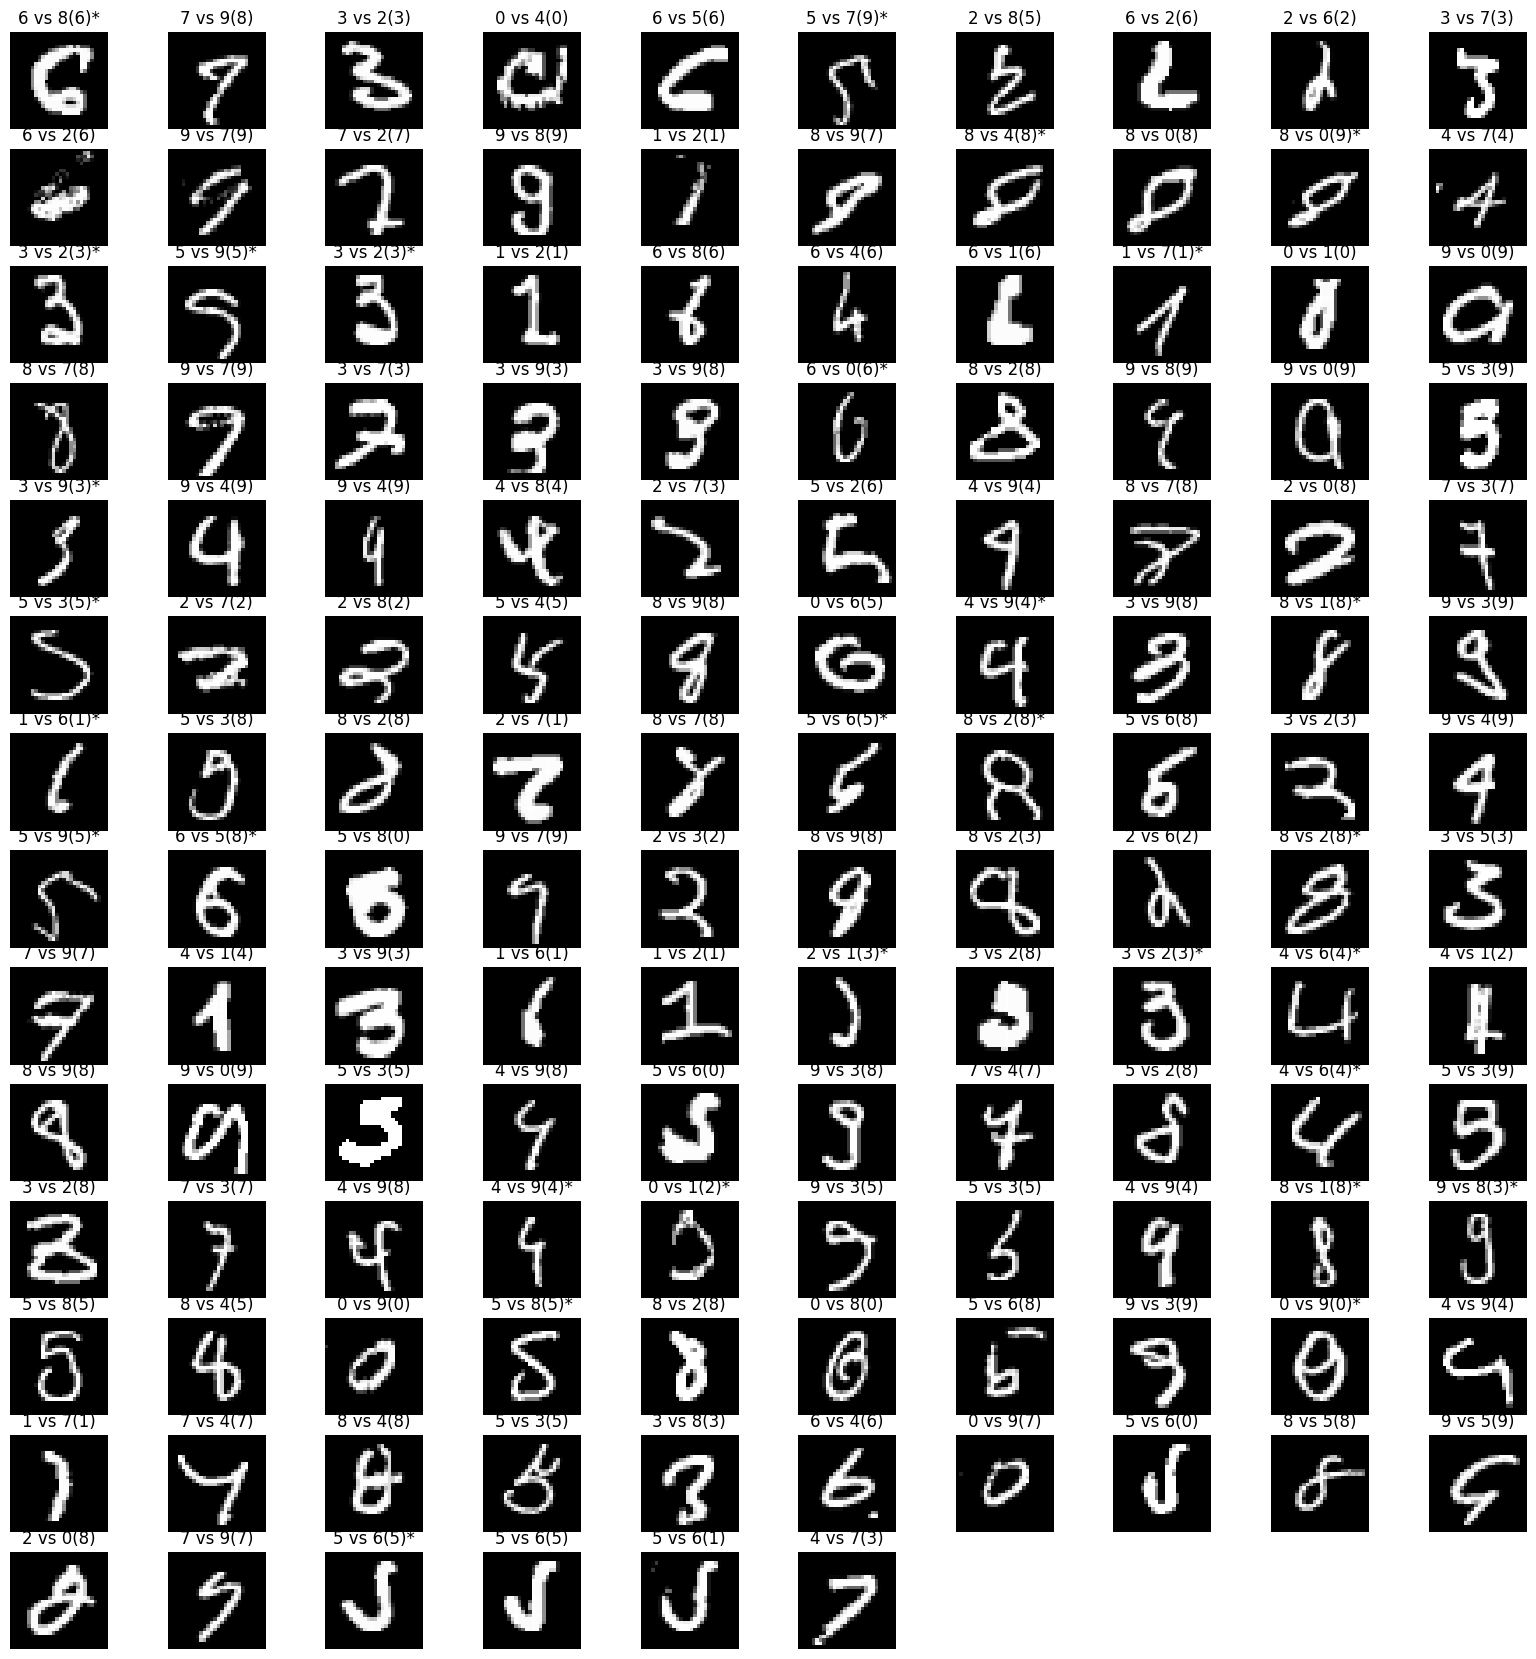

In [33]:
nsub = int(np.ceil(len(wrong)/10))

fig = plt.figure(figsize=(20,nsub*1.5))

nplt = 1

for index in wrong:
    ax = fig.add_subplot(nsub,10,nplt)
    ax.axis('off')
    if np.sort(pred_train[index])[-2] > 0.2:
        mark='*'
    else:
        mark=''
    ax.set_title(str(y_train[index])+' vs '
                 +str(pred_train[index].argmax())
                 +'('+str(np.argsort(pred_train[index])[-2])+')'+mark)
    plt.imshow(x_train[index])
    nplt += 1



##### now for the test data:

In [34]:
pred_test = model2.predict(x_test)

313/313 [==============================] - 0s 948us/step


In [35]:
wrong = [i for i in range(len(pred_test))  
         if pred_test[i].argmax() != y_test[i]]
print("number of wrong numbers:",len(wrong),
      ". That is ",len(wrong)/len(pred_test)*100,"% of the data.")

number of wrong numbers: 108 . That is  1.08 % of the data.


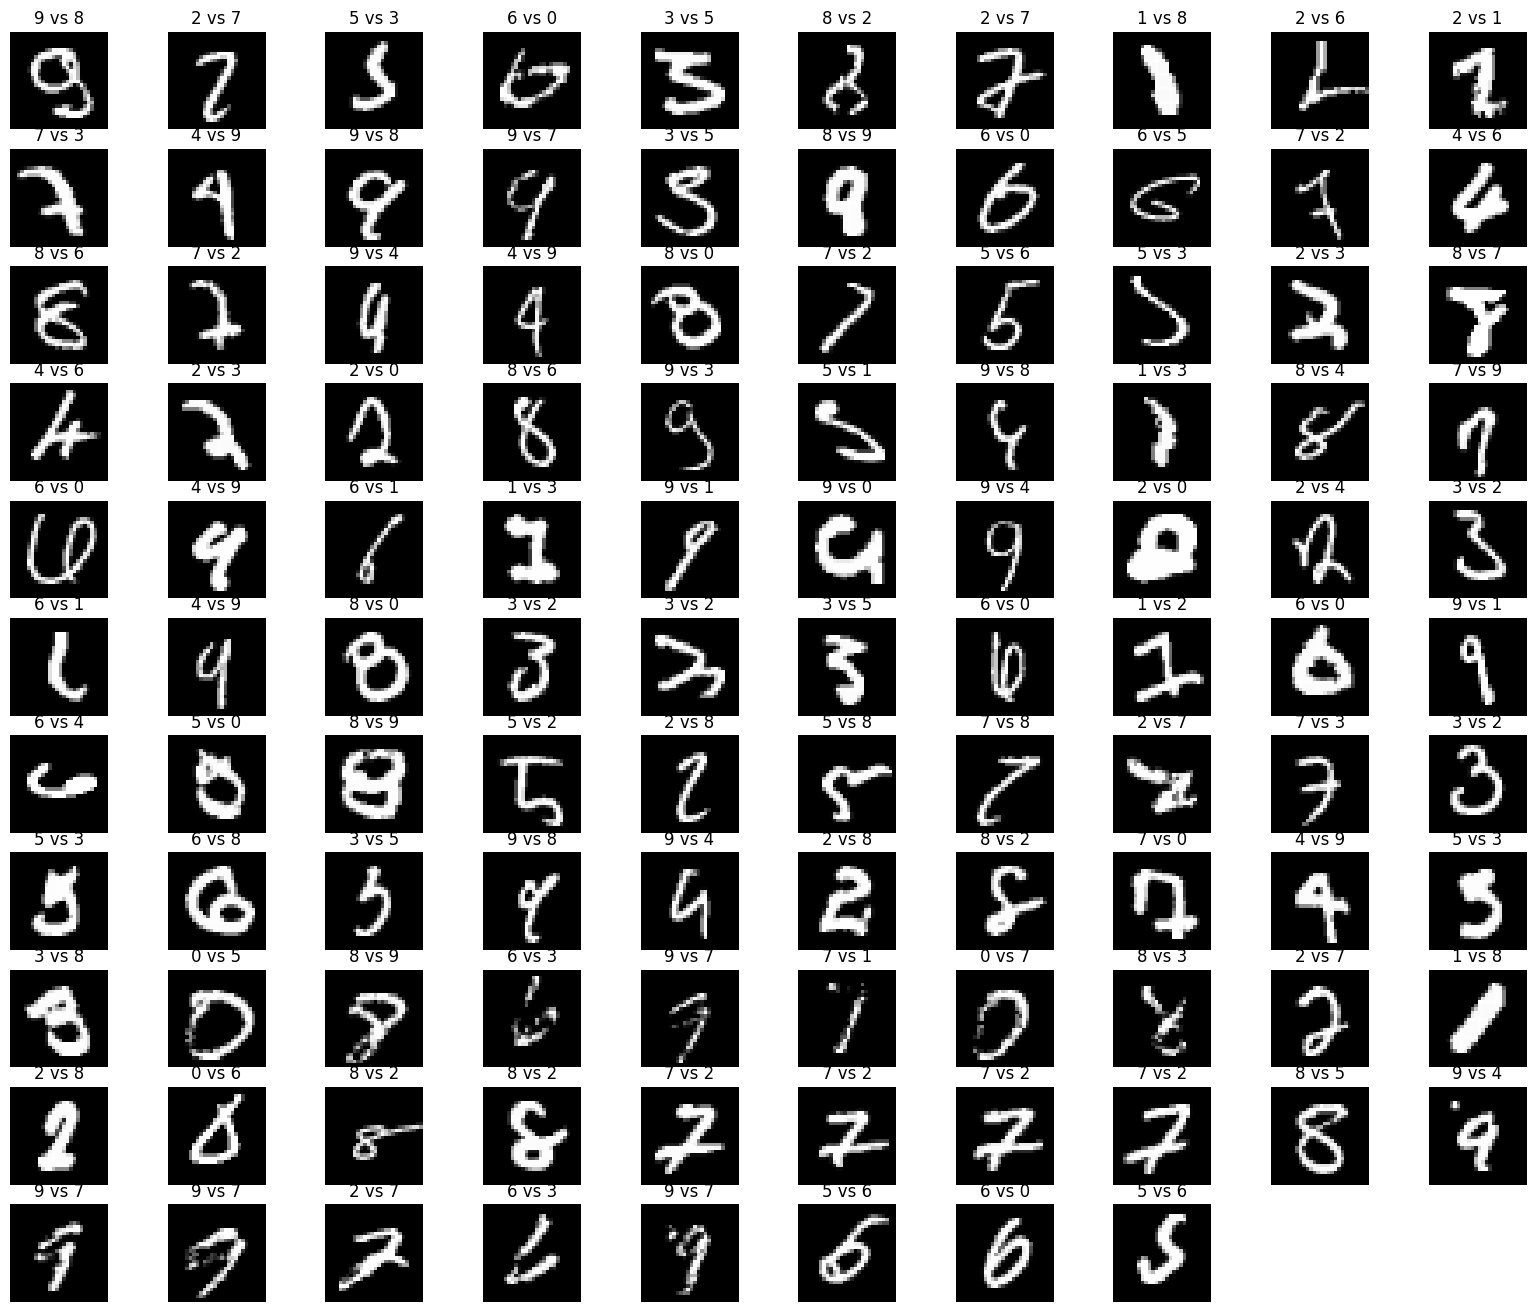

In [36]:
nsub = int(np.ceil(len(wrong)/10))

fig = plt.figure(figsize=(20,nsub*1.5))

nplt = 1

for index in wrong:
    ax = fig.add_subplot(nsub,10,nplt)
    ax.axis('off')
    ax.set_title(str(y_test[index])+' vs '
                 +str(pred_test[index].argmax()))
    plt.imshow(x_test[index])
    nplt += 1

#### 2.1.3 Analyze the conv filters

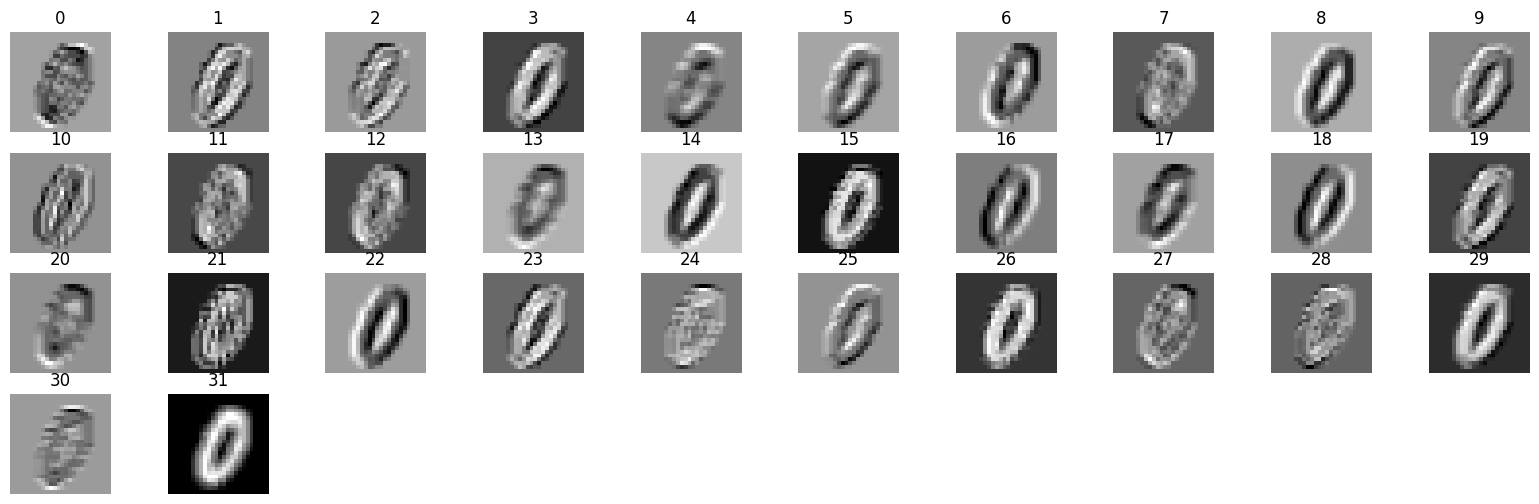

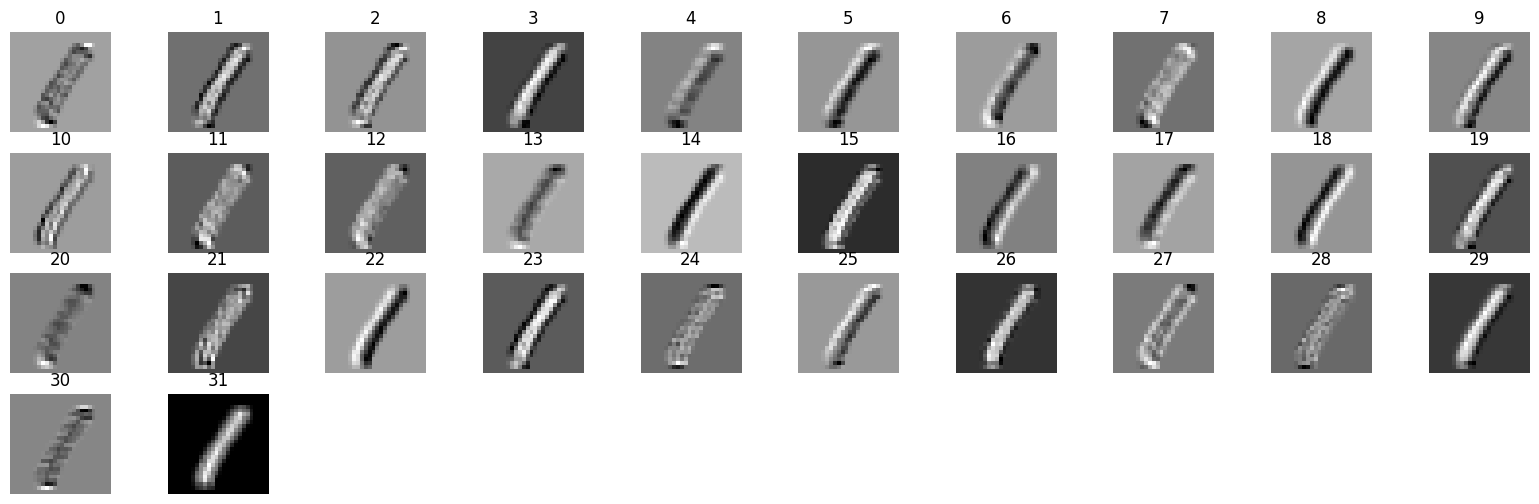

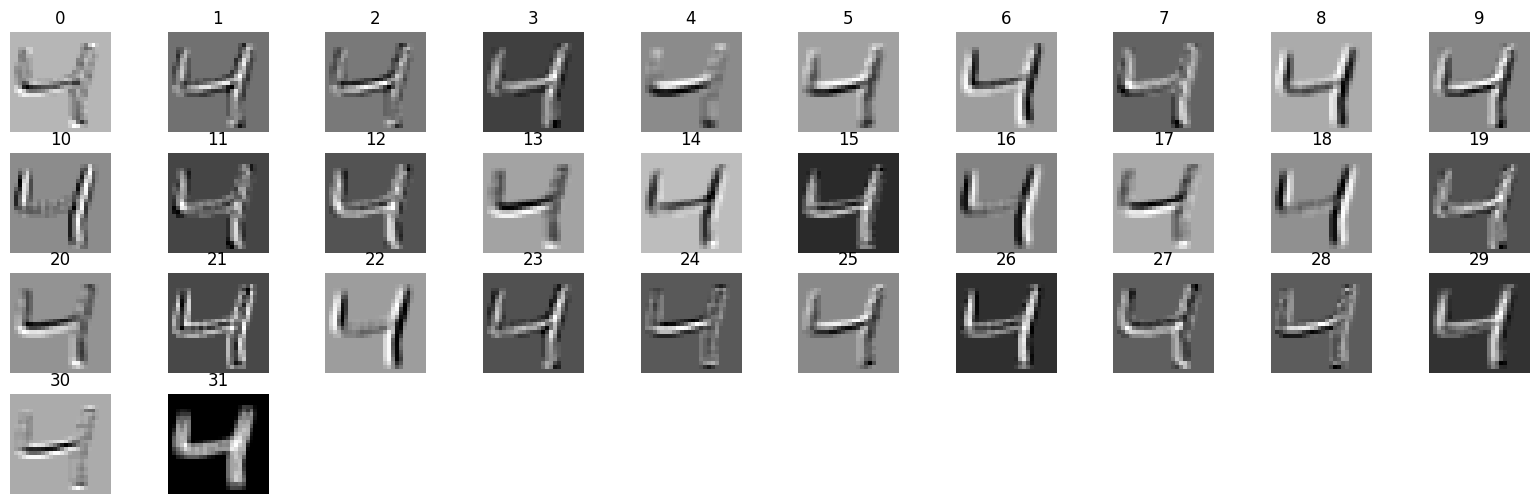

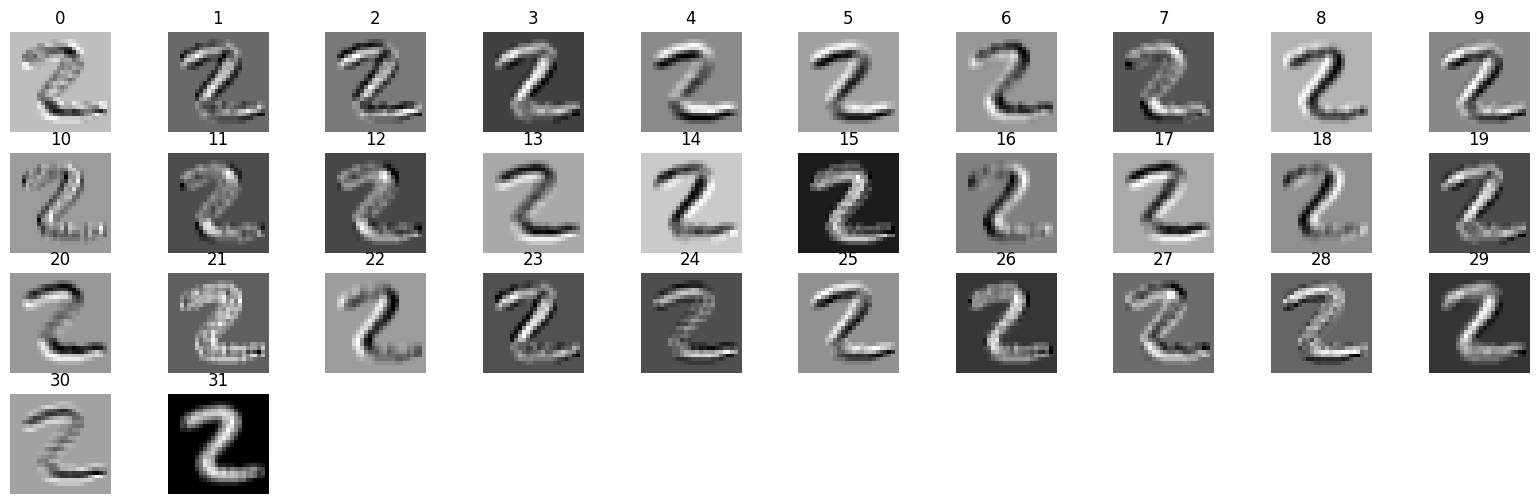

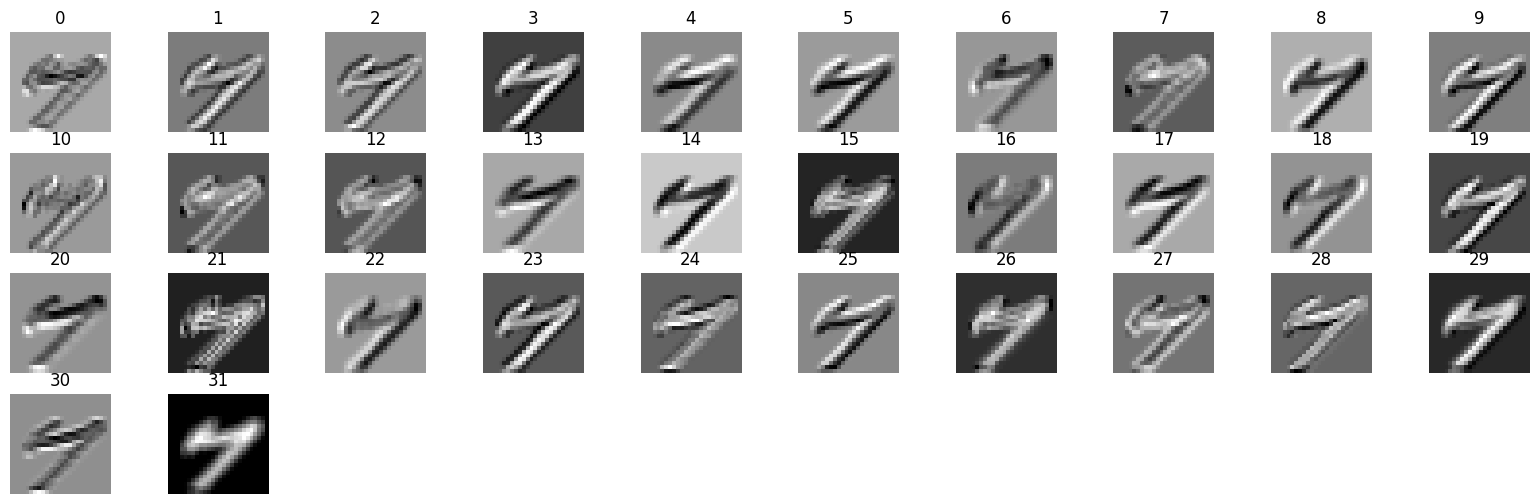

In [37]:
convm = model2.layers[0].get_weights()[0][:,:,0,:]
for i in [34,3,2,76,995]:
    conv(x_train[i],convm)

In [38]:
bias = model2.layers[0].get_weights()[1]

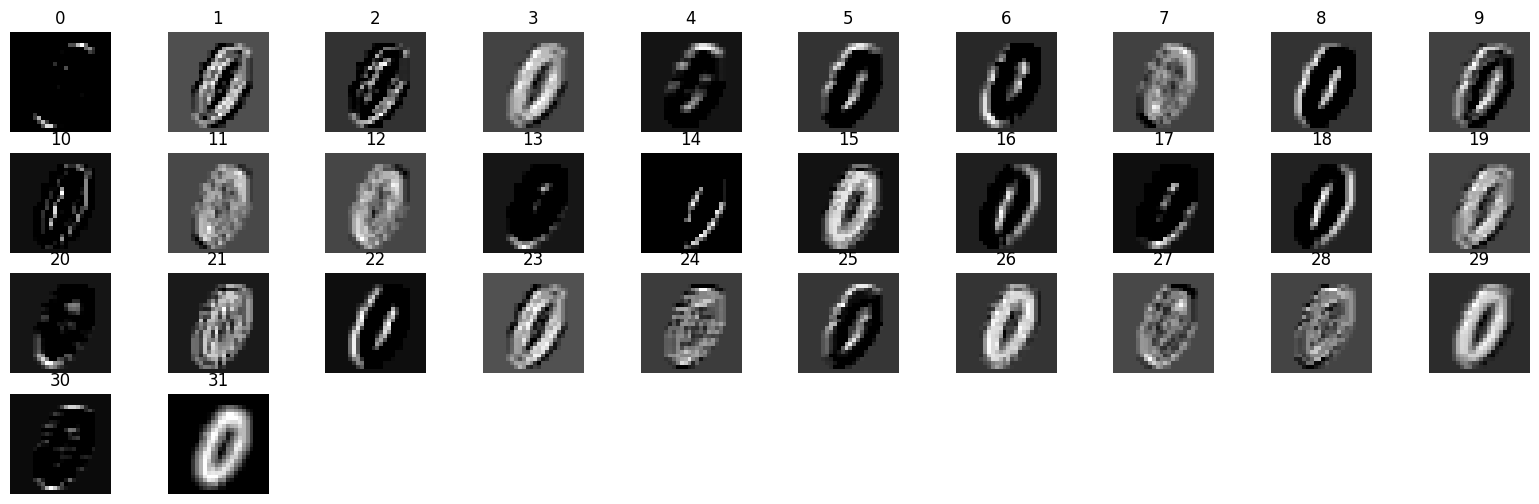

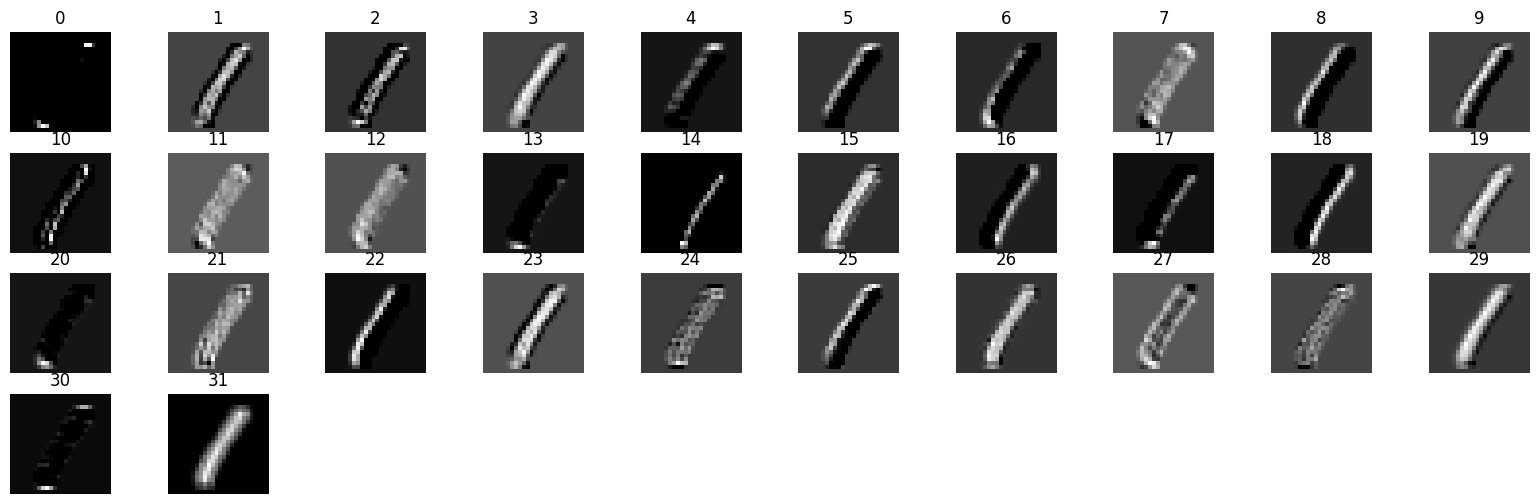

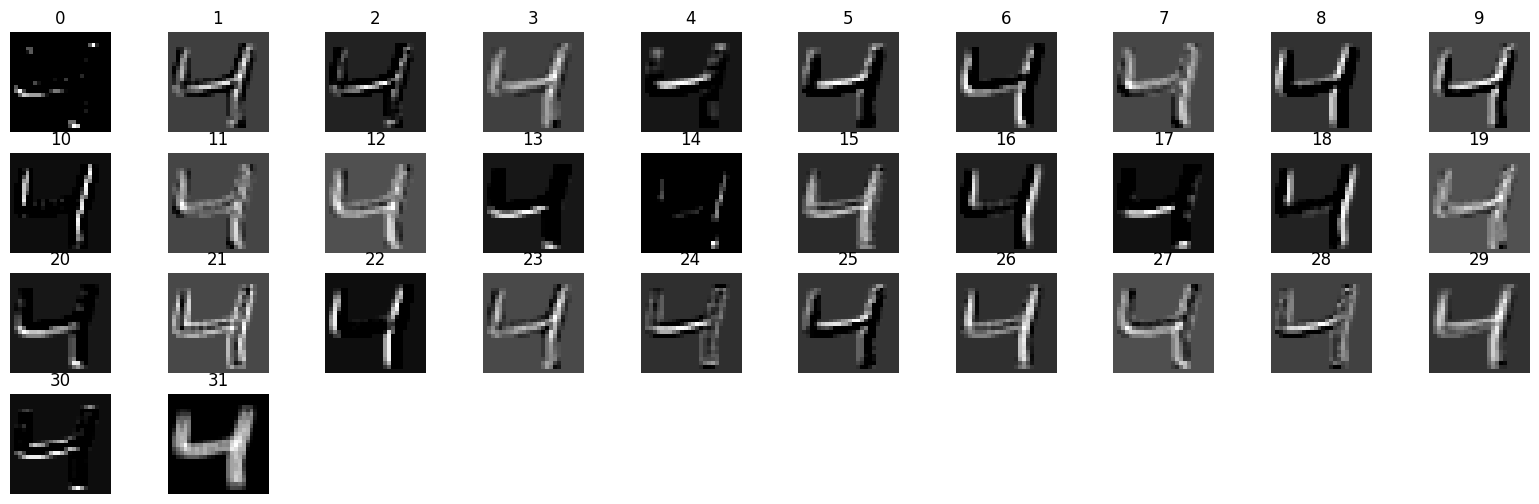

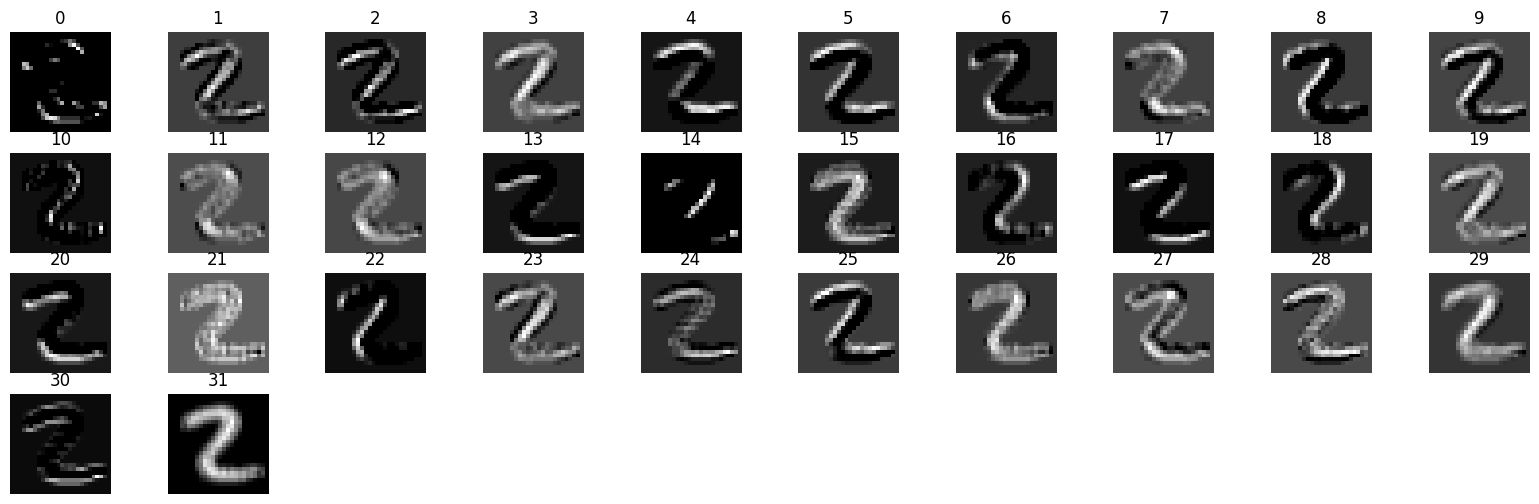

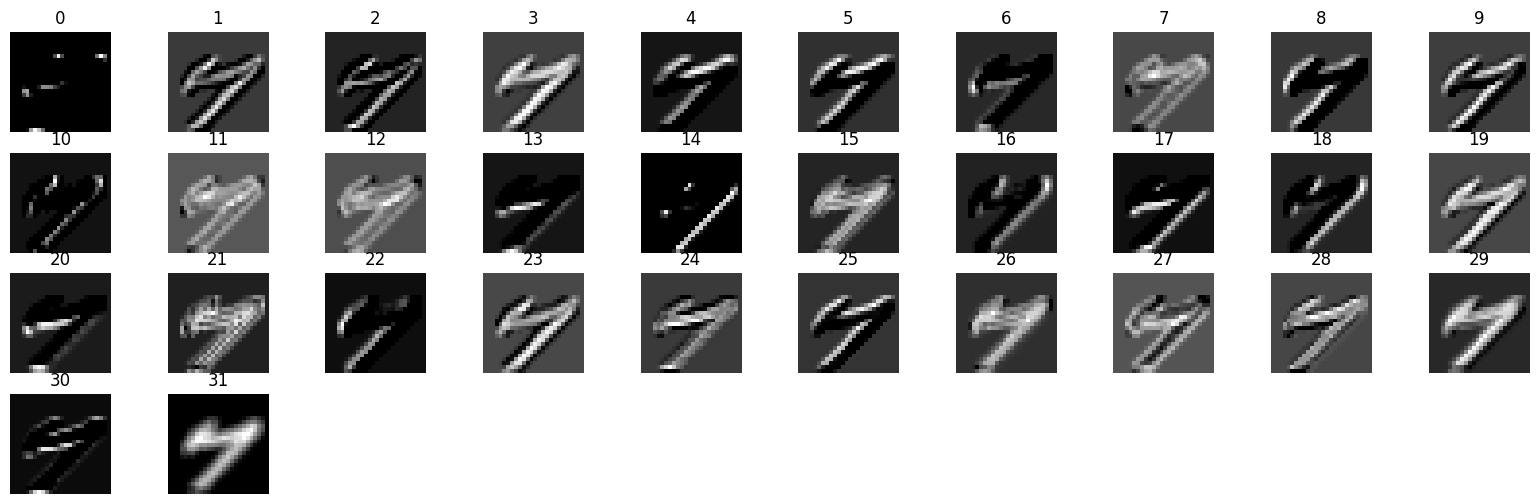

In [39]:
for i in [34,3,2,76,995]:
    conv(x_train[i],convm,af=relu,bias=-bias)

### 2.2 CNN with dropout layer

Using a dropout layer to get better generalization.

In [40]:
def create_simple_dropout_model():
    model = tf.keras.models.Sequential()
    
    # feature extraction
    model.add(keras.layers.Conv2D(filters=32,
                    kernel_size=(3,3),
                    activation="relu",
                    input_shape=(28,28,1)))

    model.add(keras.layers.MaxPooling2D(pool_size=(3,3)))

    # Classification
    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dropout(rate=0.5))

    model.add(keras.layers.Dense(units=64, activation="relu"))

    # output layer
    model.add(keras.layers.Dense(units=10, activation="softmax"))

    model.summary()

    model.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])
    
    return model

In [41]:
model_drop = create_simple_dropout_model()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                131136    
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                      

In [42]:
model_drop.fit(x_train,y_train,batch_size=64,epochs=10,
               validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3732 - accuracy: 0.8852 - val_loss: 0.1332 - val_accuracy: 0.9595
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1499 - accuracy: 0.9538 - val_loss: 0.0818 - val_accuracy: 0.9768
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1118 - accuracy: 0.9651 - val_loss: 0.0663 - val_accuracy: 0.9806
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0910 - accuracy: 0.9721 - val_loss: 0.0613 - val_accuracy: 0.9828
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0781 - accuracy: 0.9762 - val_loss: 0.0501 - val_accuracy: 0.9850
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0711 - accuracy: 0.9781 - val_loss: 0.0496 - val_accuracy: 0.9843
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0621 - accuracy: 0.9809 - val_loss: 0.0463 - val_accuracy: 0.9863
Epoch 

In [43]:
model_drop.fit(x_train,y_train,batch_size=64,epochs=20,
               validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0421 - accuracy: 0.9865 - val_loss: 0.0369 - val_accuracy: 0.9891
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0409 - accuracy: 0.9870 - val_loss: 0.0344 - val_accuracy: 0.9901
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0373 - accuracy: 0.9879 - val_loss: 0.0350 - val_accuracy: 0.9893
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0334 - accuracy: 0.9890 - val_loss: 0.0344 - val_accuracy: 0.9903
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0352 - accuracy: 0.9882 - val_loss: 0.0339 - val_accuracy: 0.9908
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0320 - accuracy: 0.9894 - val_loss: 0.0340 - val_accuracy: 0.9909
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0289 - accuracy: 0.9903 - val_loss: 0.0327 - val_accuracy: 0.9908
Epoch 

We see that the fit on the validation set is better.

One can save a trained model (note: the model is not converged):

In [44]:
model_drop.save('model_drop')

INFO:tensorflow:Assets written to: model_drop/assets


INFO:tensorflow:Assets written to: model_drop/assets


Evaluate training data and compare both CNNs:

In [45]:
model2.evaluate(x_train,y_train)
model_drop.evaluate(x_train,y_train)

1875/1875 [==============================] - 2s 924us/step - loss: 0.0095 - accuracy: 0.9975


[0.009513812139630318, 0.9975333213806152]

Note: the difference to the value during the fit is due to the dropout layer. With evaluate there is no dropout layer in condratiction to the fit.

Now we use the test data:

In [46]:
model2.evaluate(x_test,y_test)
model_drop.evaluate(x_test,y_test)

313/313 [==============================] - 0s 973us/step - loss: 0.0311 - accuracy: 0.9919


[0.031140707433223724, 0.9919000267982483]

We see that the test case improved a bit (about 0.3% (depends on run)). Thus, the dropout layer will lead to a better generalization.

### 2.3 Augmentation of data

#### 2.3.1 Translations

##### 2.3.1.1 x-direction

In [47]:
x_train_moved_x = np.zeros(x_train.shape)
for i in range(len(x_train)):
    shift=np.random.randint(-5,6)
    for j in range(max(0,shift),min(28,28+shift)):
        x_train_moved_x[i,:,j]=x_train[i,:,j-shift]


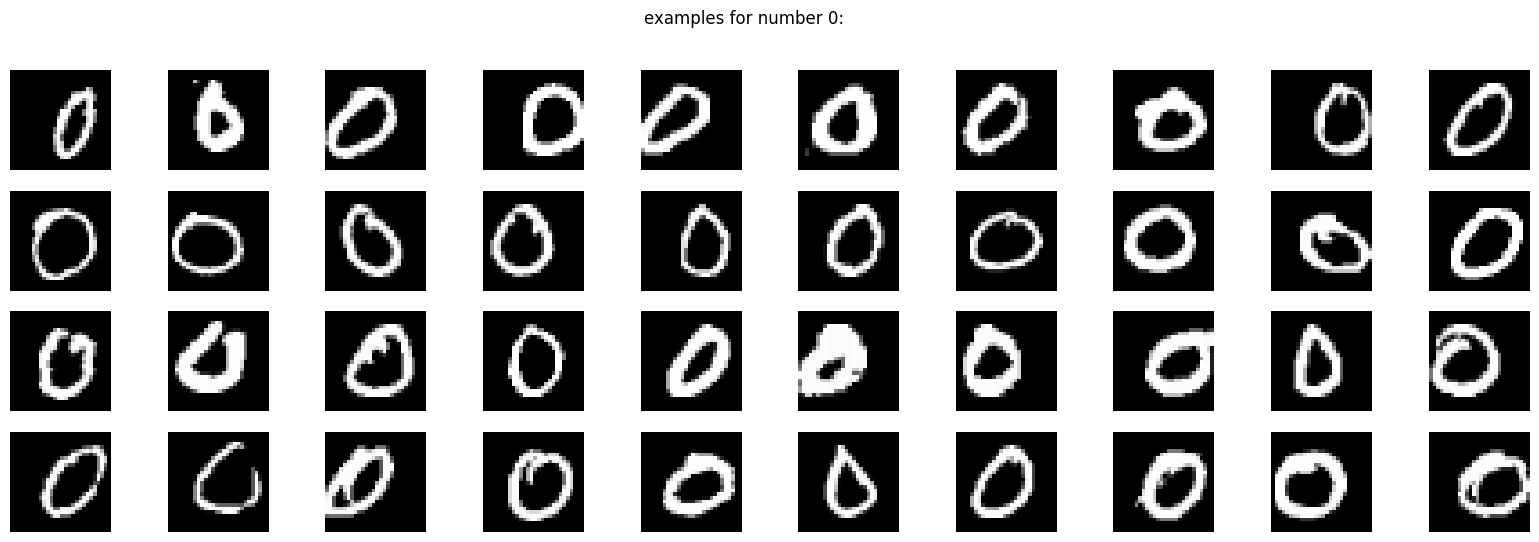

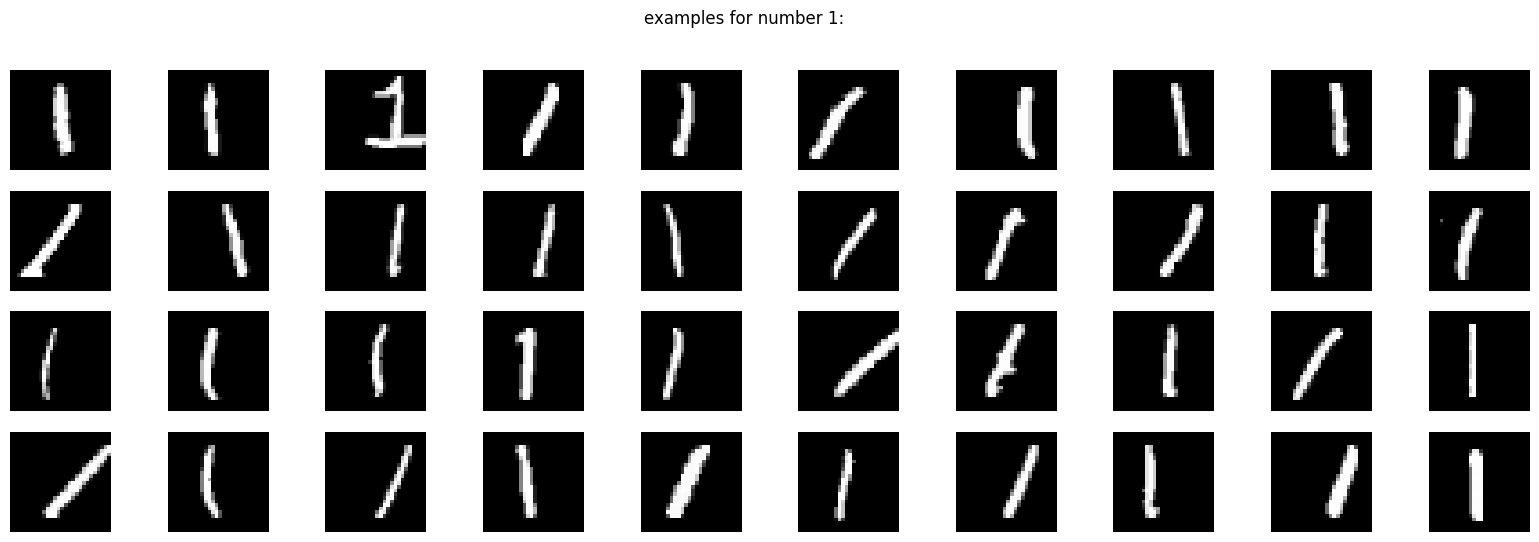

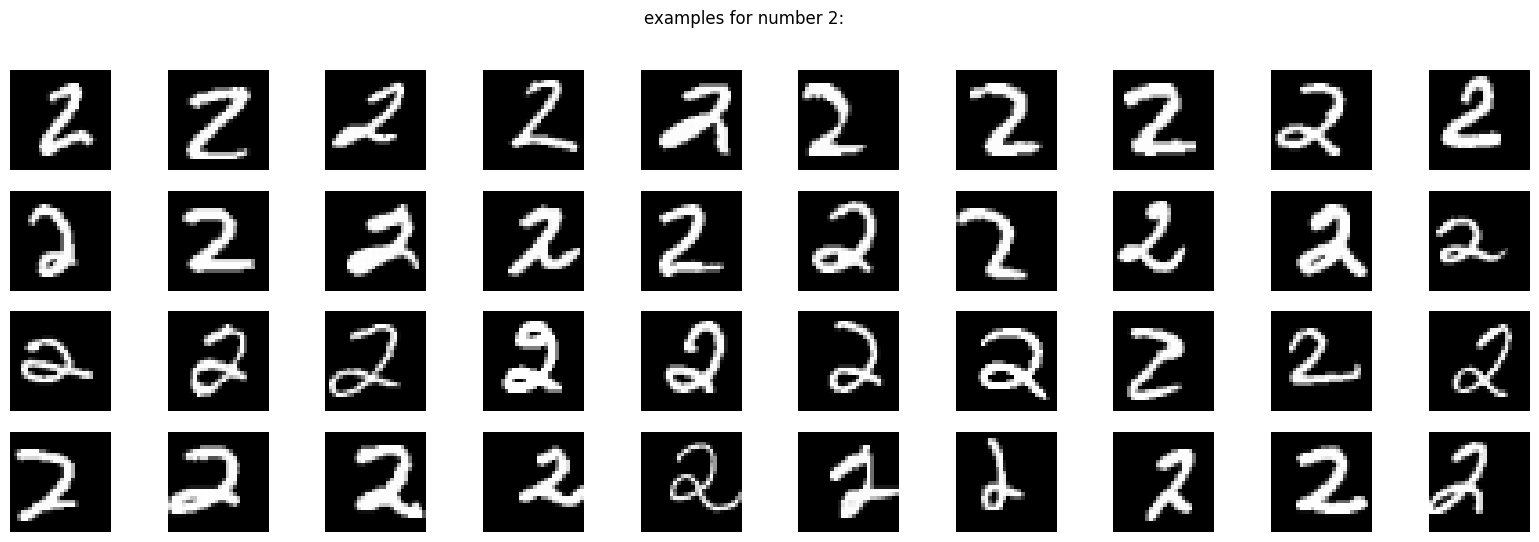

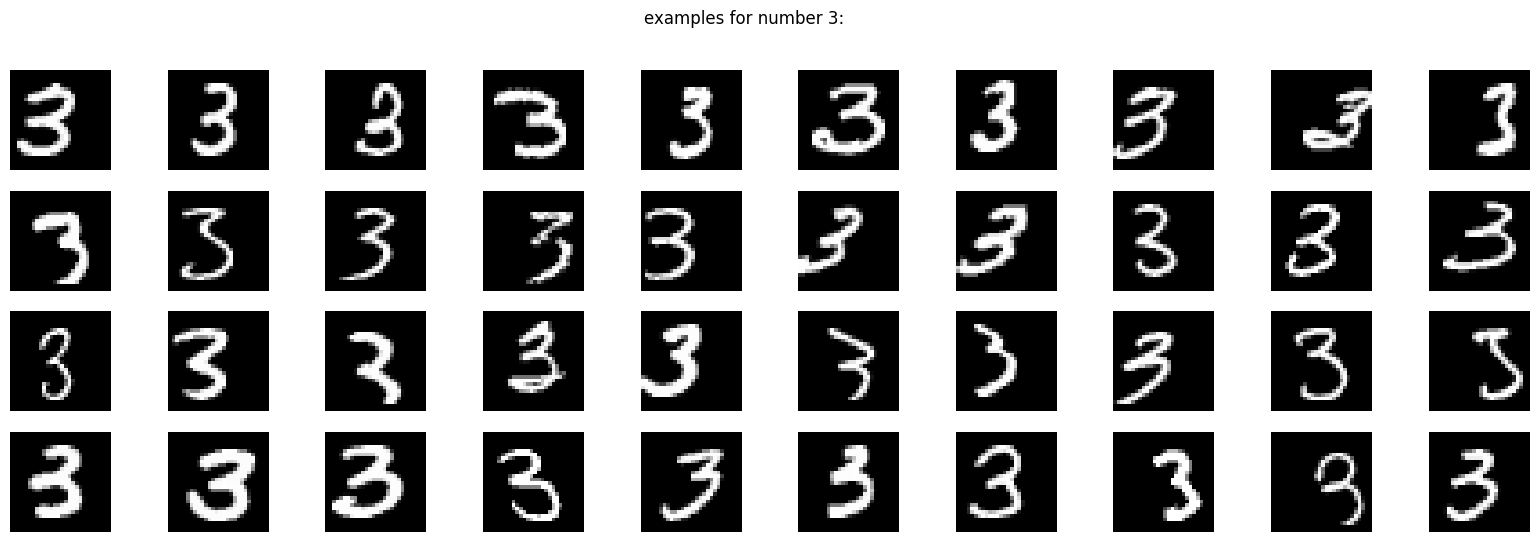

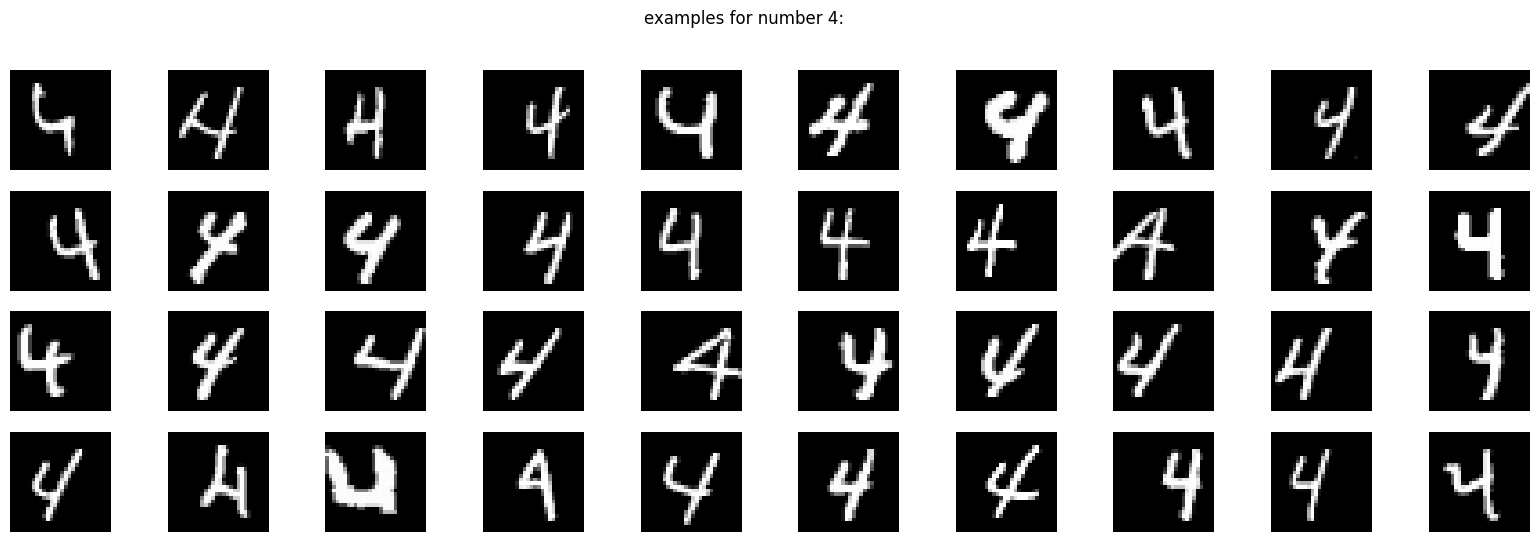

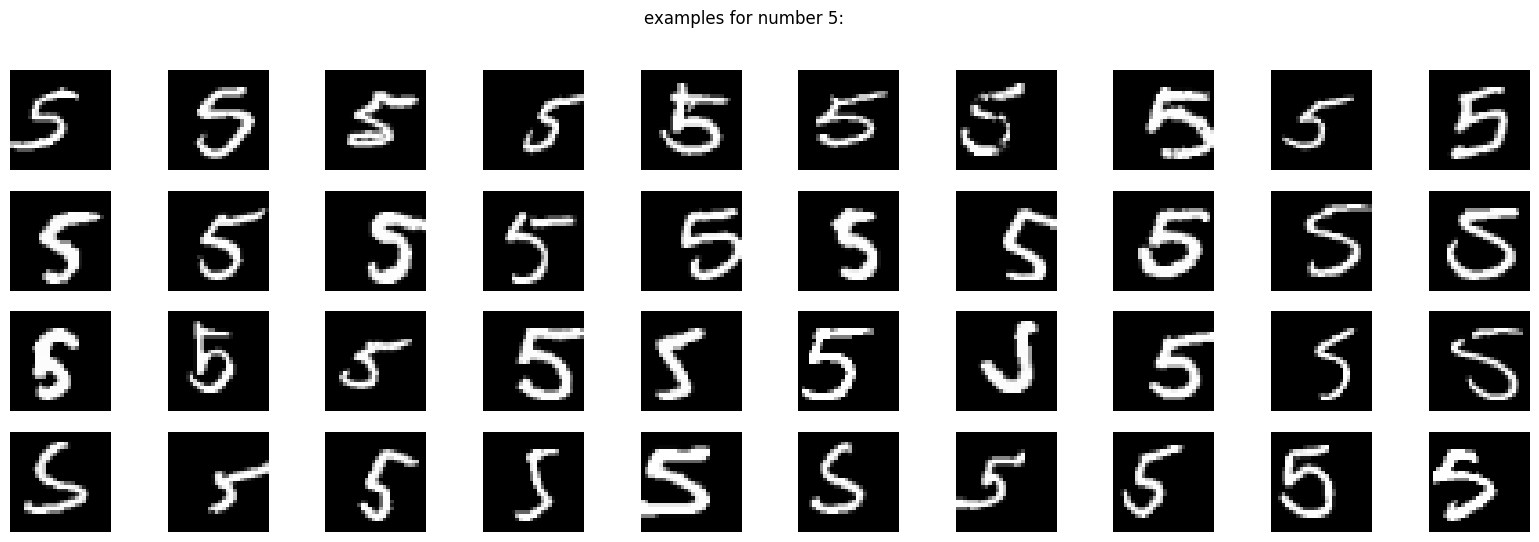

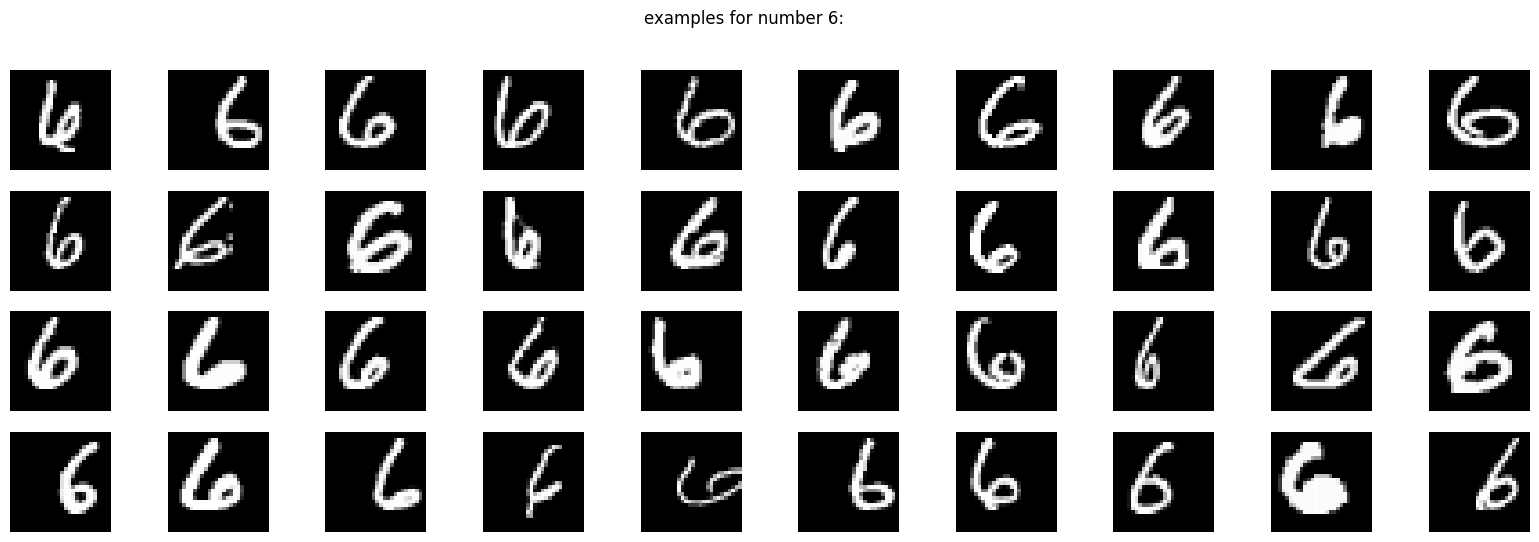

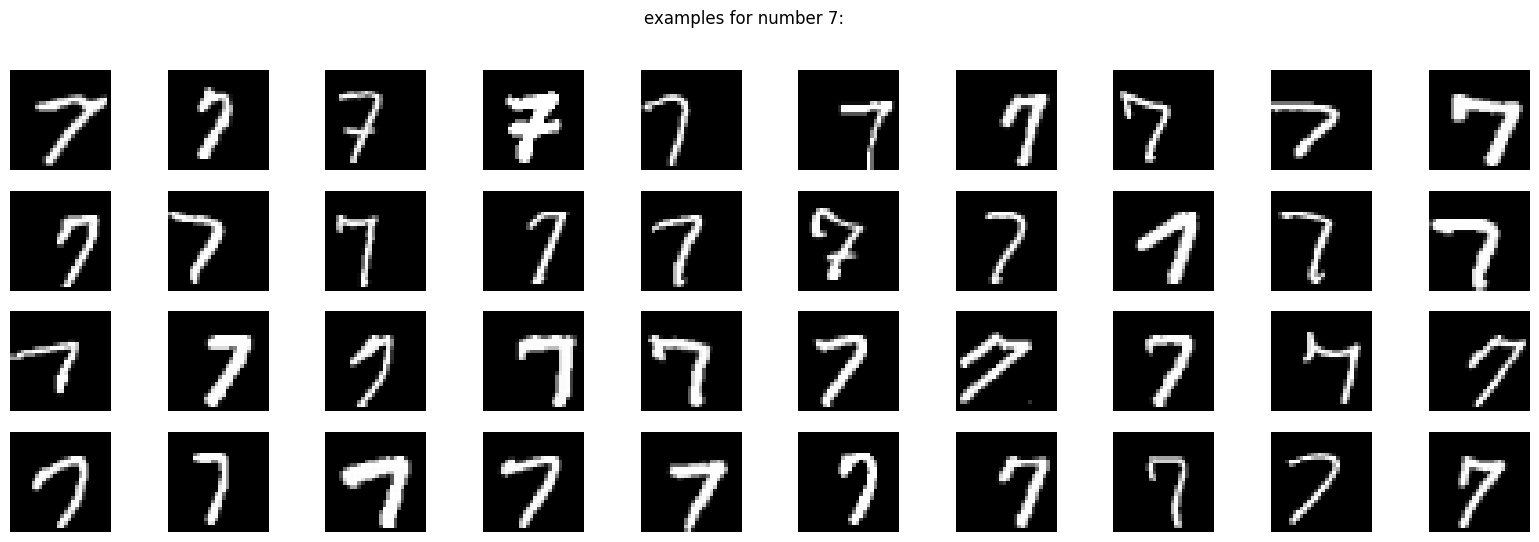

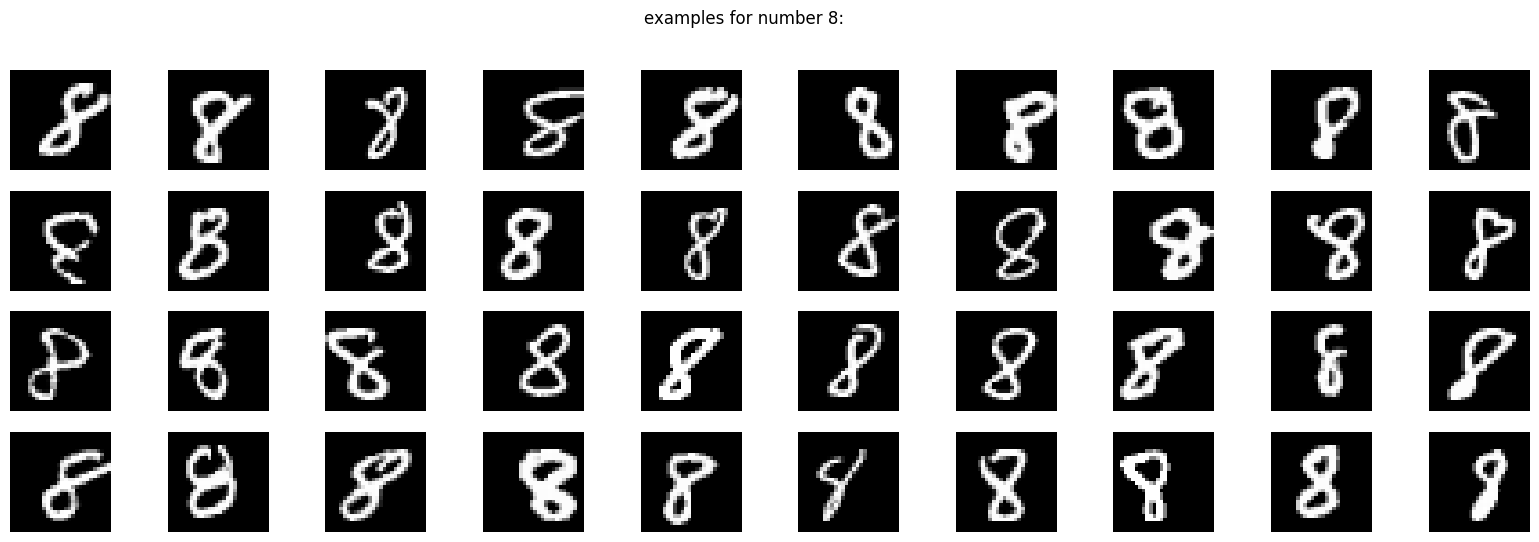

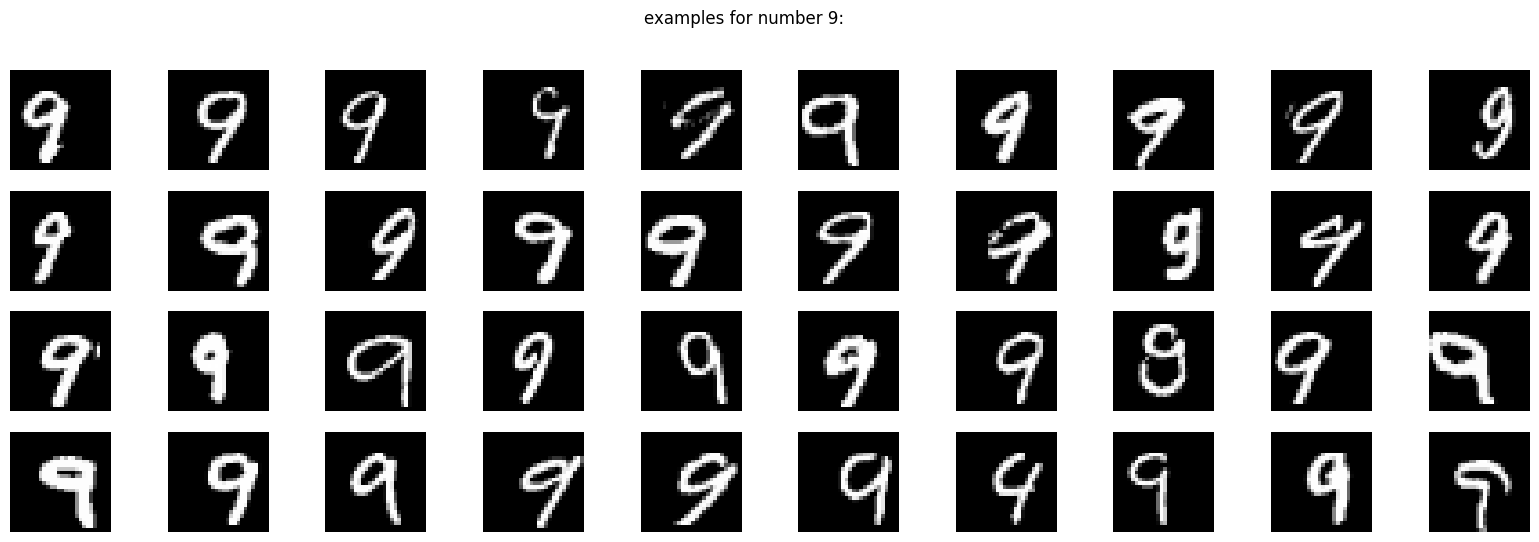

In [48]:
plot_samples(x_train_moved_x,y_train)

In [49]:
model_drop.evaluate(x_train_moved_x,y_train)

1875/1875 [==============================] - 1s 782us/step - loss: 1.1903 - accuracy: 0.7947


[1.1903101205825806, 0.7947499752044678]

We see a strong decrease in correct classification just due to some small shifts in x-direction.

Now do a new fitting using the moved data as well.

**Note:** tensorflow is using for the validation set just the last data samples. Thus, we need to shuffle the original and moved data in order to get no bias in the validation set:

In [50]:
x_train_all = np.concatenate([x_train,x_train_moved_x])
y_train_all = np.concatenate([y_train,y_train])
perm = np.random.permutation(len(x_train_all))

x_train_all = x_train_all[perm]
y_train_all = y_train_all[perm]

In [51]:
model_drop_move_x = create_simple_dropout_model()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 64)                131136    
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                      

In [52]:
model_drop_move_x.fit(x_train_all,y_train_all,
          batch_size=64,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3455 - accuracy: 0.8963 - val_loss: 0.1242 - val_accuracy: 0.9649
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1426 - accuracy: 0.9558 - val_loss: 0.0797 - val_accuracy: 0.9758
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1078 - accuracy: 0.9667 - val_loss: 0.0637 - val_accuracy: 0.9807
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0868 - accuracy: 0.9723 - val_loss: 0.0560 - val_accuracy: 0.9821
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0729 - accuracy: 0.9768 - val_loss: 0.0532 - val_accuracy: 0.9835
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0673 - accuracy: 0.9785 - val_loss: 0.0451 - val_accuracy: 0.9869
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0598 - accuracy: 0.9804 - val_loss: 0.0476 - val_accuracy:

Just evaluate the model on our different data sets:

In [53]:
model_drop_move_x.evaluate(x_train,y_train)
model_drop_move_x.evaluate(x_train_moved_x,y_train)
model_drop_move_x.evaluate(x_test,y_test)

313/313 [==============================] - 0s 886us/step - loss: 0.0300 - accuracy: 0.9904


[0.029968595132231712, 0.9904000163078308]

Now test with a new movement into x-direction (new in the sense of random):

In [54]:
x_train_moved_x2 = np.zeros(x_train.shape)
for i in range(len(x_train)):
    shift=np.random.randint(-5,6)
    for j in range(max(0,shift),min(28,28+shift)):
        x_train_moved_x2[i,:,j]=x_train[i,:,j-shift]

In [55]:
model_drop_move_x.evaluate(x_train_moved_x2,y_train)

1875/1875 [==============================] - 1s 753us/step - loss: 0.0362 - accuracy: 0.9890


[0.0361560620367527, 0.9890499711036682]

This seems to work fine.

##### 2.3.1.2 y-direction

Now make a movement into the y-direction:

In [56]:
x_train_moved_y = np.zeros(x_train.shape)
for i in range(len(x_train)):
    shift=np.random.randint(-5,6)
    for j in range(max(0,shift),min(28,28+shift)):
        x_train_moved_y[i,j,:]=x_train[i,j-shift,:]

In [57]:
model_drop.evaluate(x_train_moved_y,y_train)
model_drop_move_x.evaluate(x_train_moved_y,y_train)

1875/1875 [==============================] - 2s 840us/step - loss: 2.1351 - accuracy: 0.7080


[2.135146141052246, 0.707966685295105]

This looks really bad. Now make a new fit of the network including movement in y-direction:

In [58]:
x_train_all = np.concatenate([x_train,x_train_moved_x,x_train_moved_y])
y_train_all = np.concatenate([y_train,y_train,y_train])
perm = np.random.permutation(len(x_train_all))

x_train_all = x_train_all[perm]
y_train_all = y_train_all[perm]

In [59]:
model_drop_move_x.fit(x_train_all,y_train_all,
          batch_size=64,epochs=10,validation_split=0.2)

Epoch 1/10
2250/2250 [==============================] - 9s 4ms/step - loss: 0.1324 - accuracy: 0.9606 - val_loss: 0.0522 - val_accuracy: 0.9845
Epoch 2/10
2250/2250 [==============================] - 9s 4ms/step - loss: 0.0803 - accuracy: 0.9744 - val_loss: 0.0452 - val_accuracy: 0.9860
Epoch 3/10
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0699 - accuracy: 0.9776 - val_loss: 0.0396 - val_accuracy: 0.9875
Epoch 4/10
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0627 - accuracy: 0.9797 - val_loss: 0.0408 - val_accuracy: 0.9865
Epoch 5/10
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0600 - accuracy: 0.9807 - val_loss: 0.0388 - val_accuracy: 0.9878
Epoch 6/10
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0547 - accuracy: 0.9822 - val_loss: 0.0380 - val_accuracy: 0.9879
Epoch 7/10
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0518 - accuracy: 0.9828 - val_loss: 0.0361 - val_accu

**Note:** training is not converged yet.

Now test with all our datasets:

In [60]:
model_drop_move_x.evaluate(x_train,y_train)
model_drop_move_x.evaluate(x_train_moved_x,y_train)
model_drop_move_x.evaluate(x_train_moved_y,y_train)
model_drop_move_x.evaluate(x_test,y_test)

313/313 [==============================] - 0s 738us/step - loss: 0.0294 - accuracy: 0.9916


[0.029366472736001015, 0.991599977016449]

Now test this with a new movement in y-direction:

In [61]:
x_train_moved_y2 = np.zeros(x_train.shape)
for i in range(len(x_train)):
    shift=np.random.randint(-5,6)
    for j in range(max(0,shift),min(28,28+shift)):
        x_train_moved_y2[i,j,:]=x_train[i,j-shift,:]

In [62]:
model_drop_move_x.evaluate(x_train_moved_y2,y_train)

1875/1875 [==============================] - 2s 880us/step - loss: 0.0561 - accuracy: 0.9831


[0.056114498525857925, 0.9830999970436096]

##### 2.3.1.3 Arbitrary direction

Now making a translation in x- and y-direction:

In [63]:
x_train_moved_all = np.zeros(x_train.shape)
for i in range(len(x_train)):
    shiftx=np.random.randint(-5,6)
    shifty=np.random.randint(-5,6)
    for j in range(max(0,shifty),min(28,28+shifty)):
        for k in range(max(0,shiftx),min(28,28+shiftx)):
            x_train_moved_all[i,j,k]=x_train[i,j-shifty,k-shiftx]

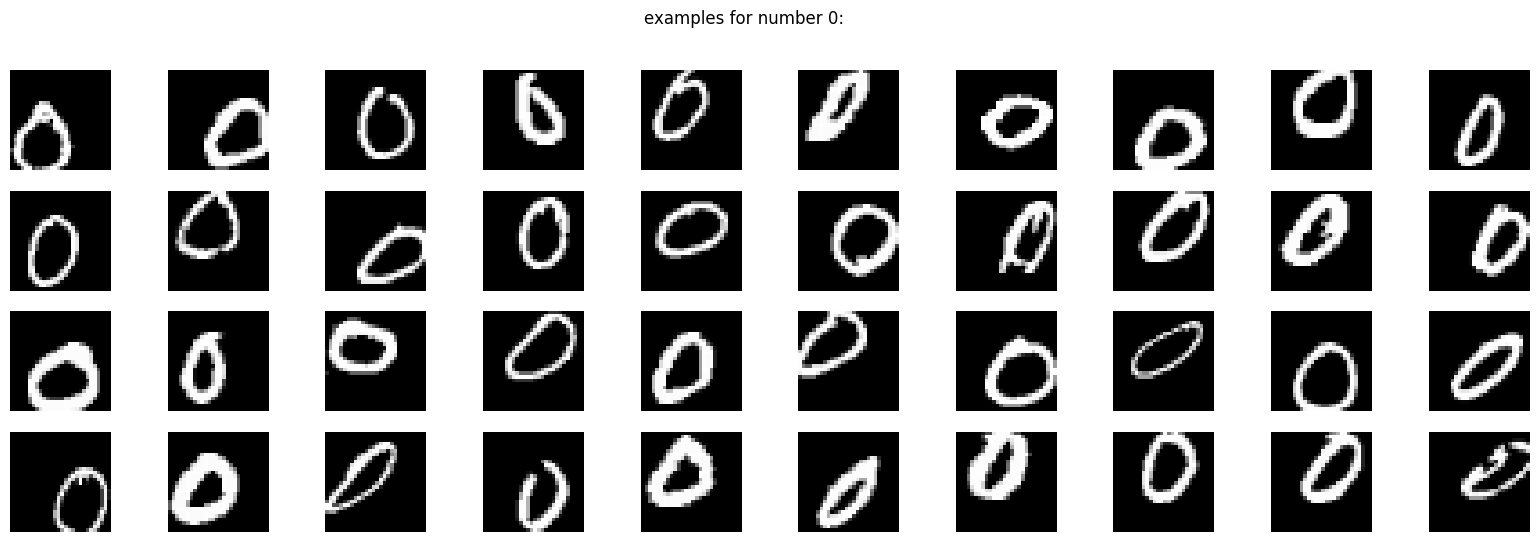

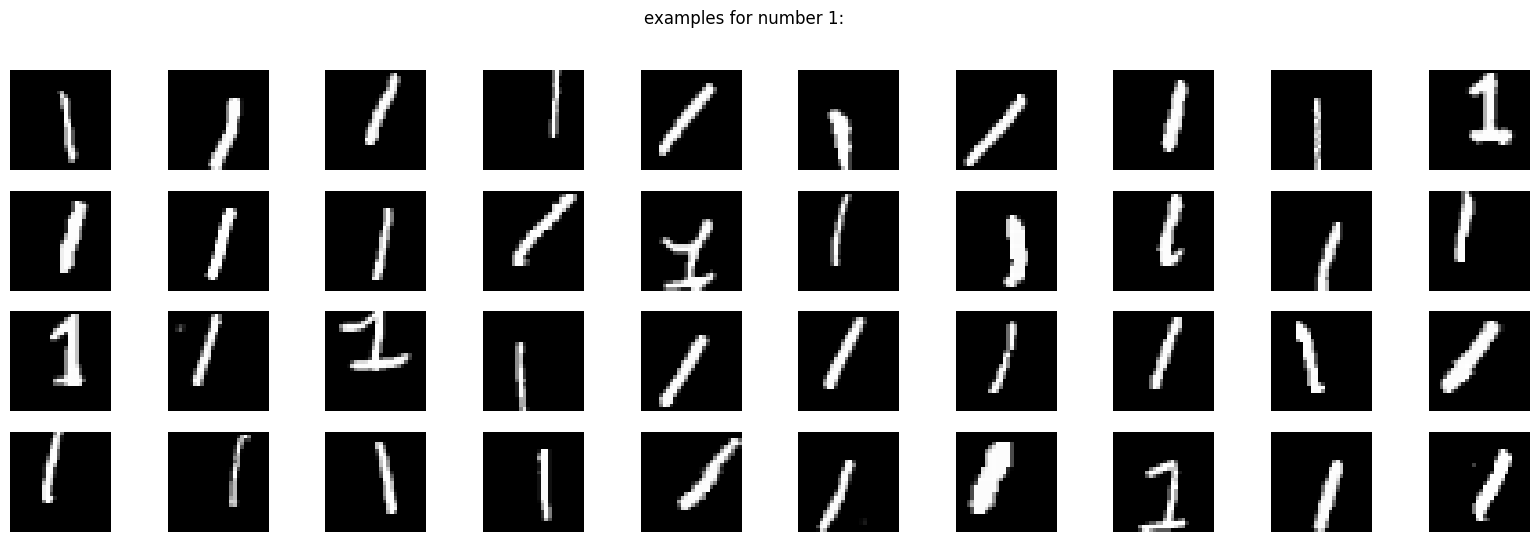

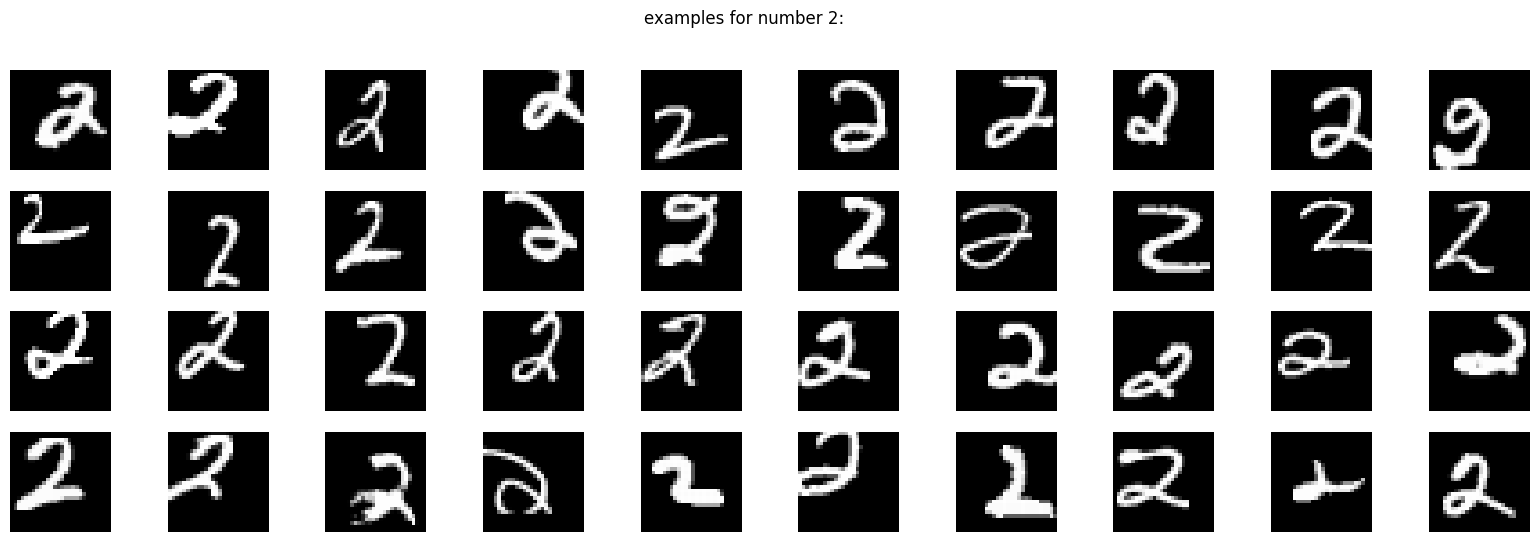

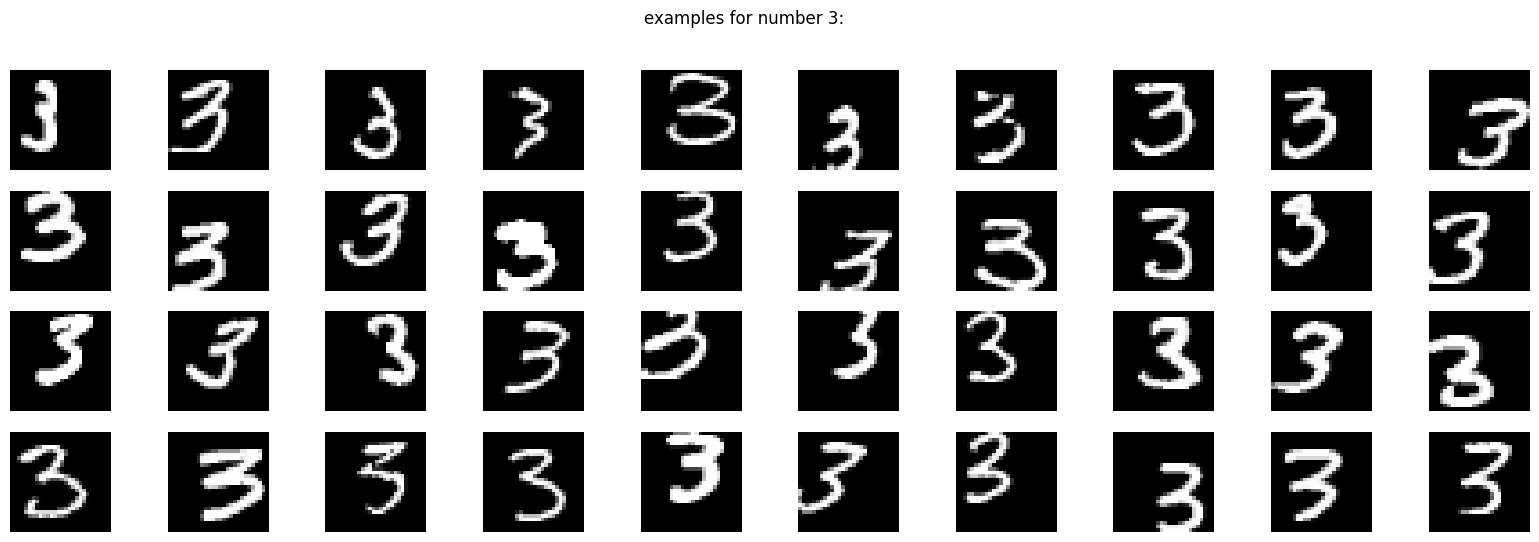

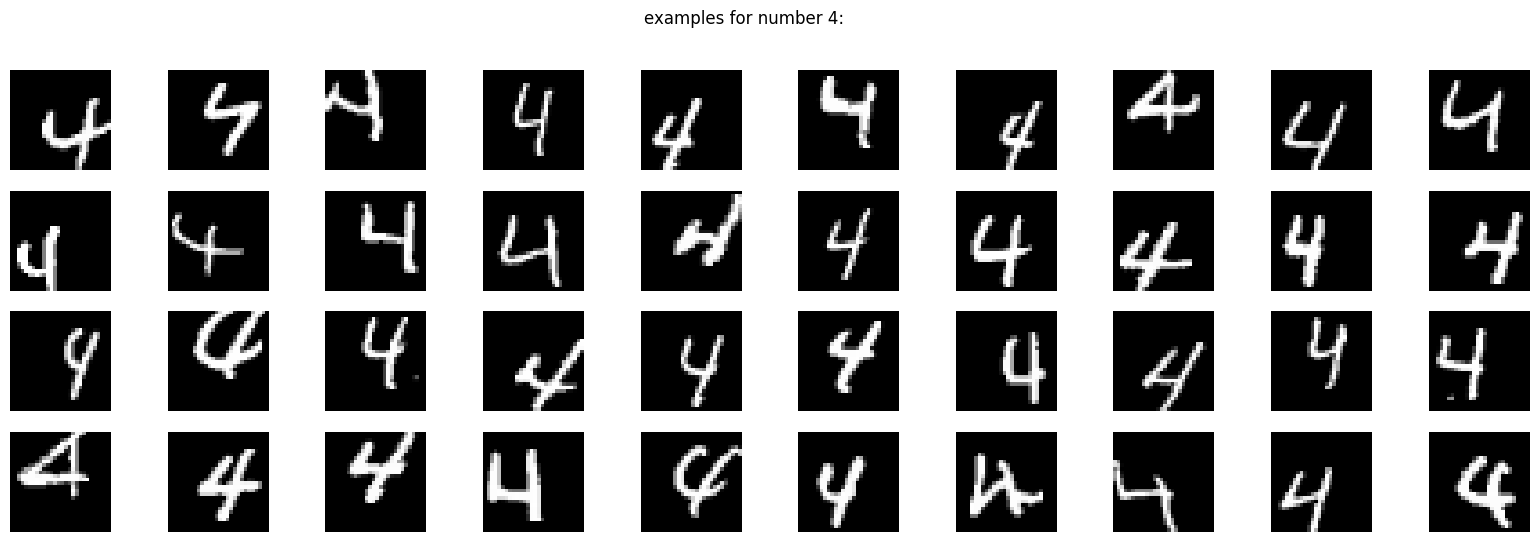

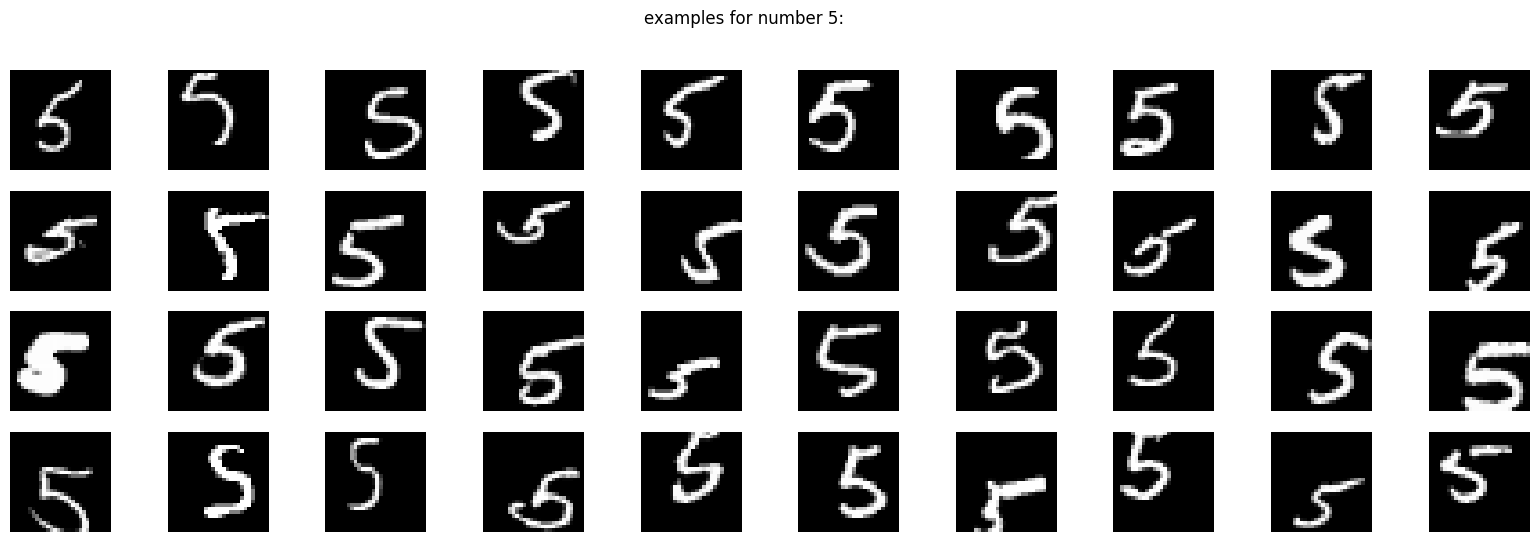

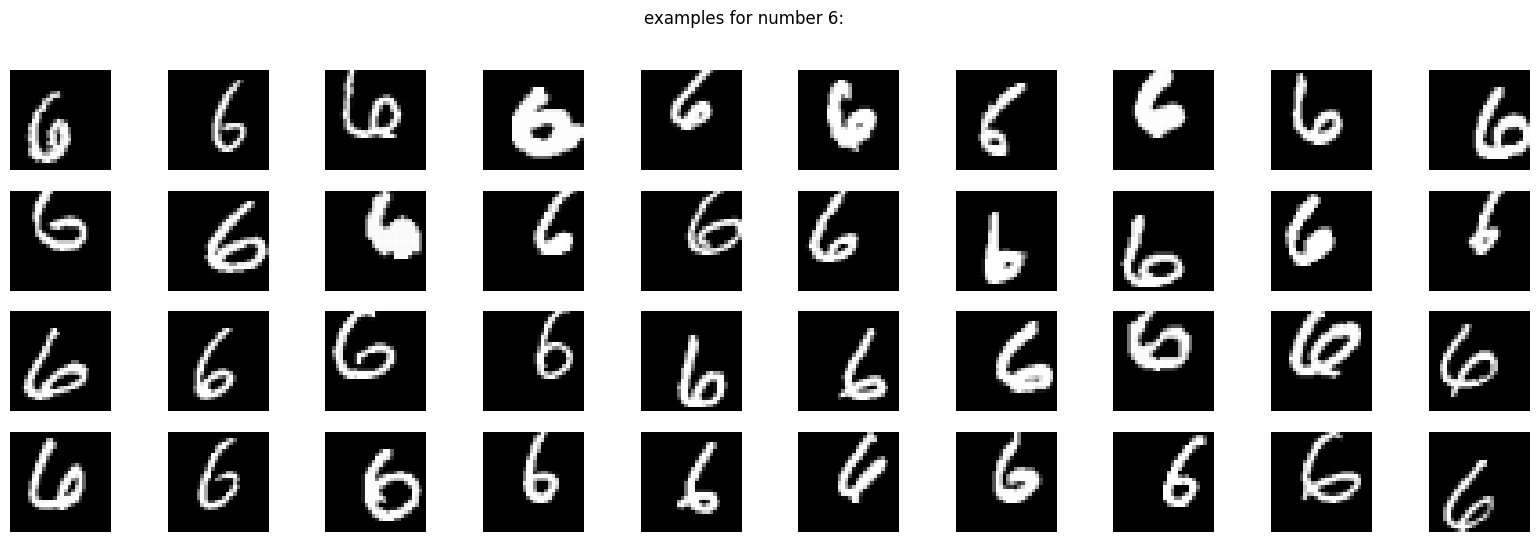

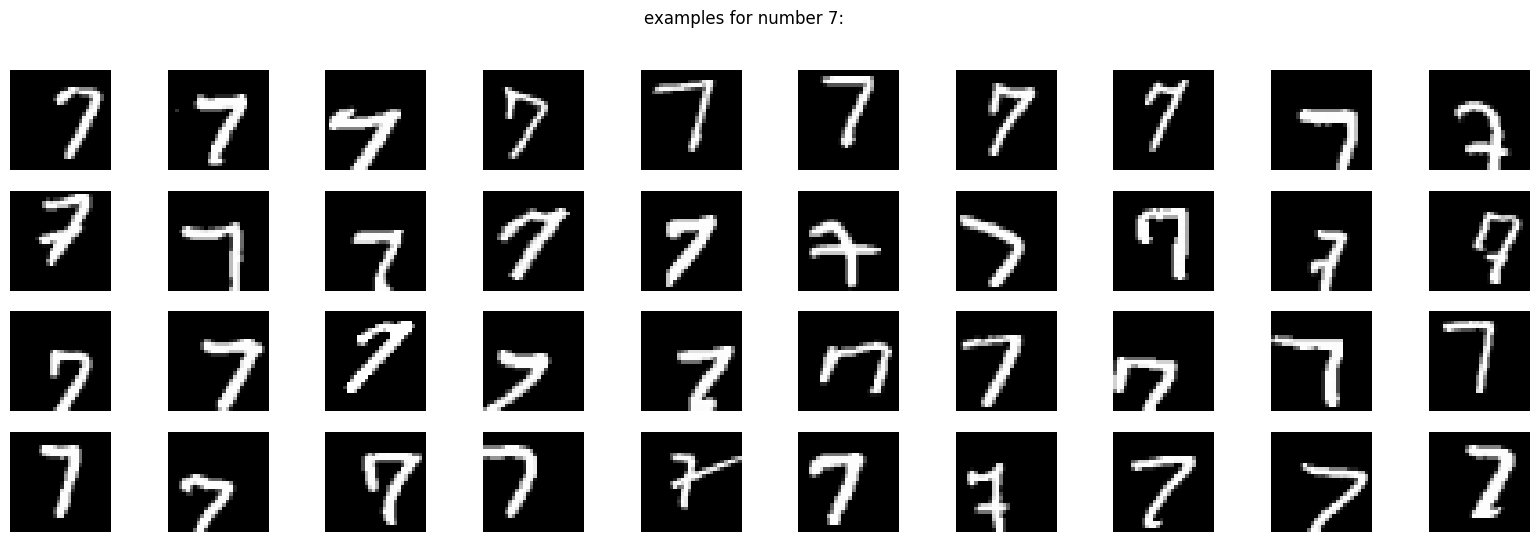

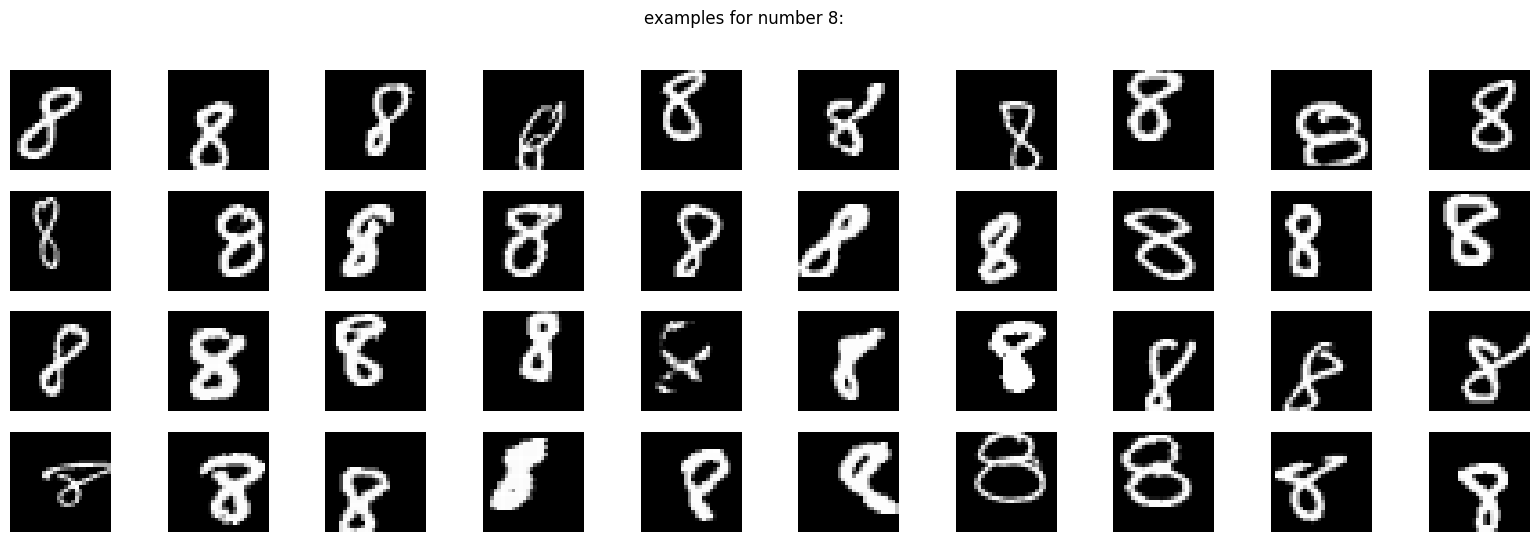

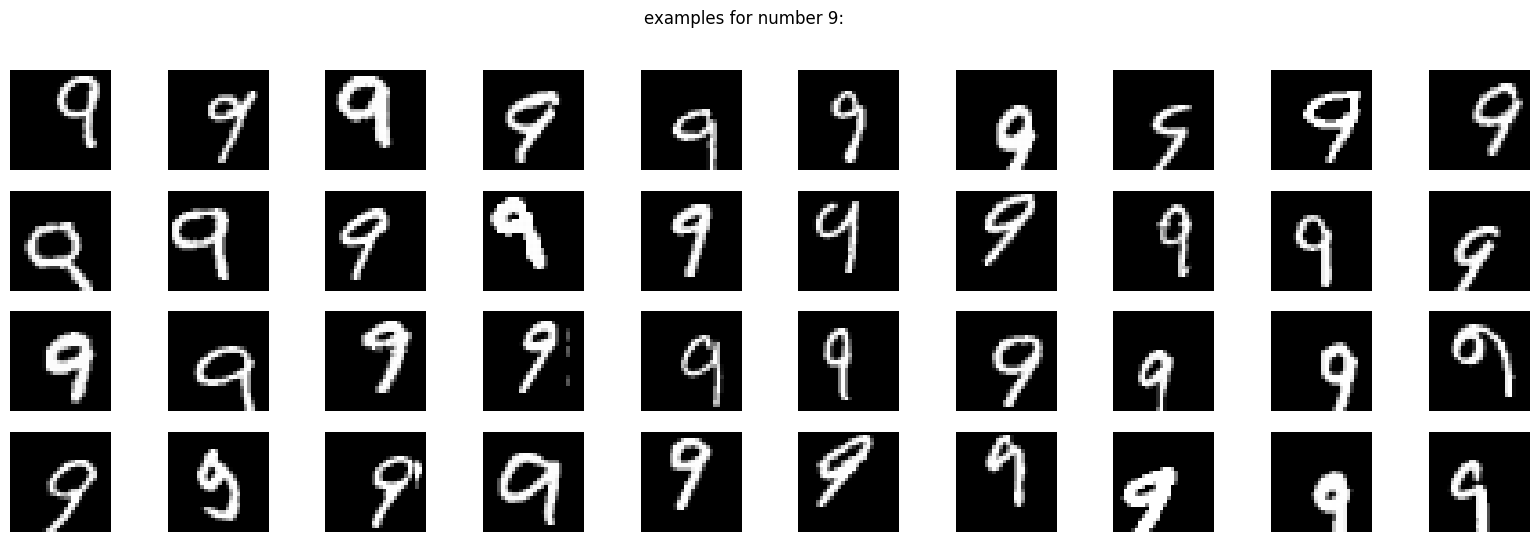

In [64]:
plot_samples(x_train_moved_all,y_train)

In [65]:
model_drop_move_x.evaluate(x_train_moved_all,y_train)

1875/1875 [==============================] - 2s 900us/step - loss: 0.4120 - accuracy: 0.8996


[0.41201546788215637, 0.8996166586875916]

Not perfect, but better. Fit with these general translations might be needed.

In [66]:
x_train_all = np.concatenate([x_train,x_train_moved_all])
y_train_all = np.concatenate([y_train,y_train])
perm = np.random.permutation(len(x_train_all))

x_train_all = x_train_all[perm]
y_train_all = y_train_all[perm]

In [67]:
model_drop_move = create_simple_dropout_model()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_12 (Dense)            (None, 64)                131136    
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                      

In [68]:
model_drop_move.fit(x_train_all,y_train_all,
          batch_size=64,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6154 - accuracy: 0.8041 - val_loss: 0.2428 - val_accuracy: 0.9299
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2690 - accuracy: 0.9151 - val_loss: 0.1671 - val_accuracy: 0.9501
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2019 - accuracy: 0.9378 - val_loss: 0.1360 - val_accuracy: 0.9592
Epoch 4/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1698 - accuracy: 0.9465 - val_loss: 0.1112 - val_accuracy: 0.9663
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1472 - accuracy: 0.9536 - val_loss: 0.1079 - val_accuracy: 0.9666
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1319 - accuracy: 0.9586 - val_loss: 0.0886 - val_accuracy: 0.9729
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1222 - accuracy: 0.9616 - val_loss: 0.0845 - val_accuracy:

Now test on all our datasets:

In [69]:
model_drop_move.evaluate(x_train,y_train)
model_drop_move.evaluate(x_train_moved_all,y_train)
model_drop_move.evaluate(x_train_moved_x,y_train)
model_drop_move.evaluate(x_train_moved_y,y_train)
model_drop_move.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.9904


[0.03260023891925812, 0.9904000163078308]

Looks like the general movement is also good for the pure x- and y-direction.

In [70]:
model_drop_move.save('model_drop_move')

INFO:tensorflow:Assets written to: model_drop_move/assets


INFO:tensorflow:Assets written to: model_drop_move/assets


#### 2.3.2 Rotations

We will rotate randomly betwenn -30 and 30 degrees.

In [71]:
x_train_rotate = np.zeros(x_train.shape)
for i in range(len(x_train)):
    x_train_rotate[i,:,:]=rotate_image(x_train[i],
                    rotation_angle=np.random.randint(-30,31))

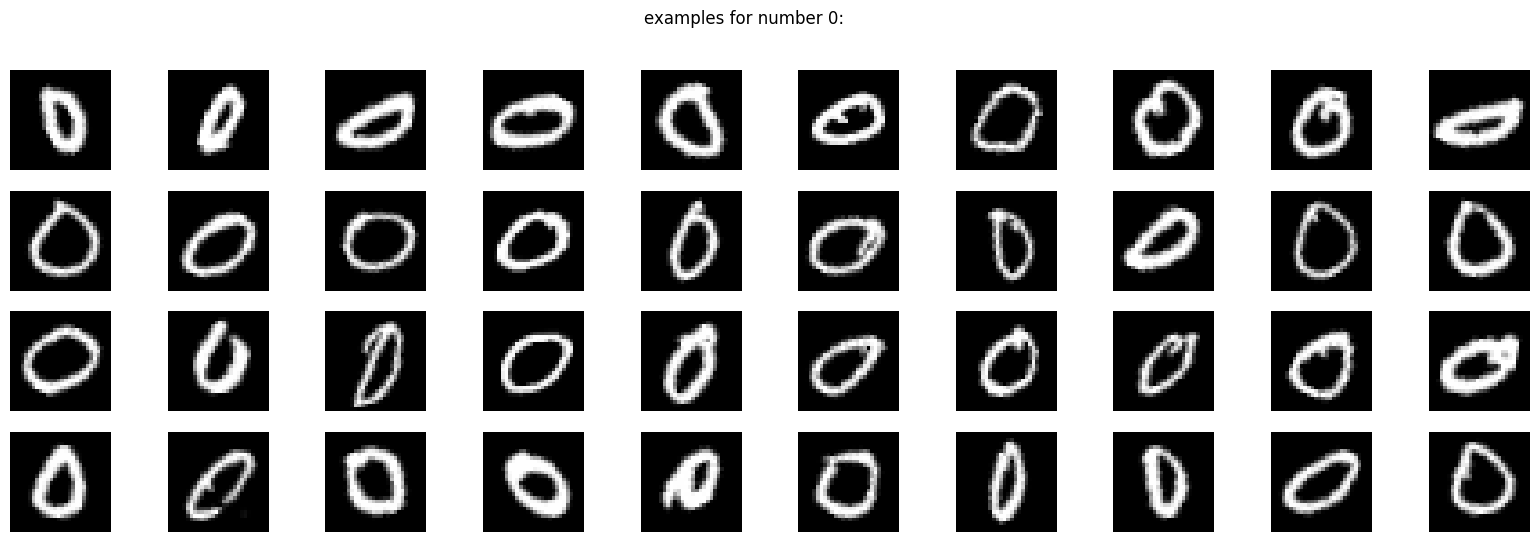

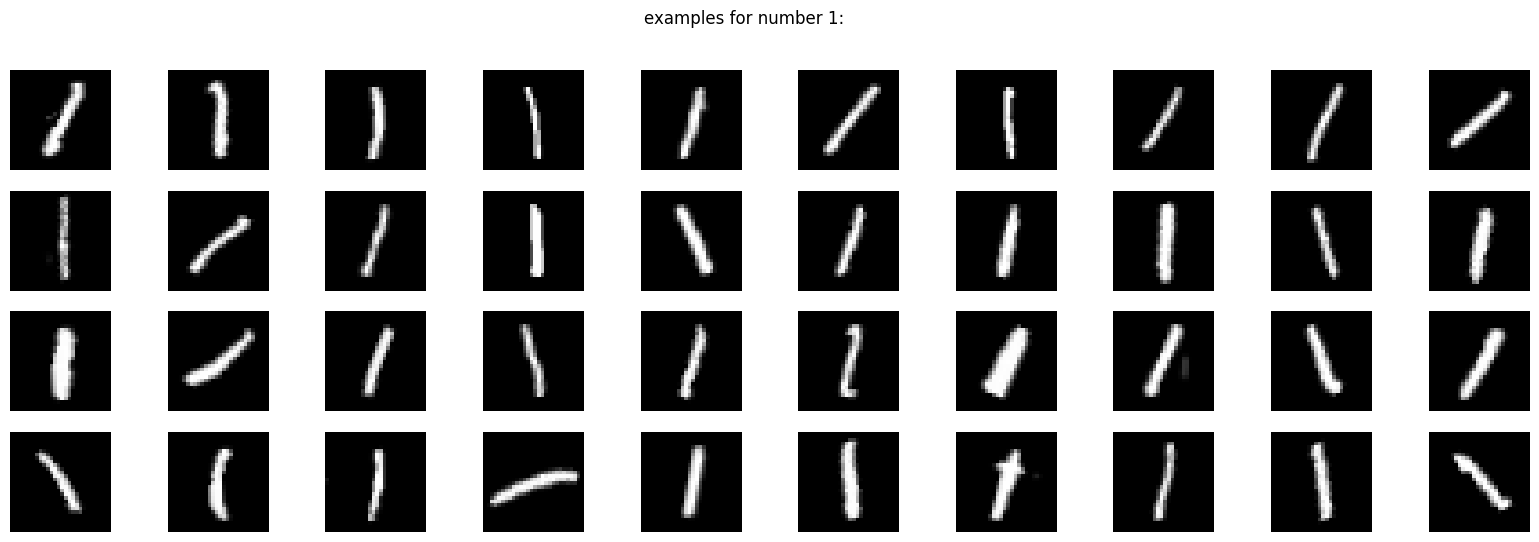

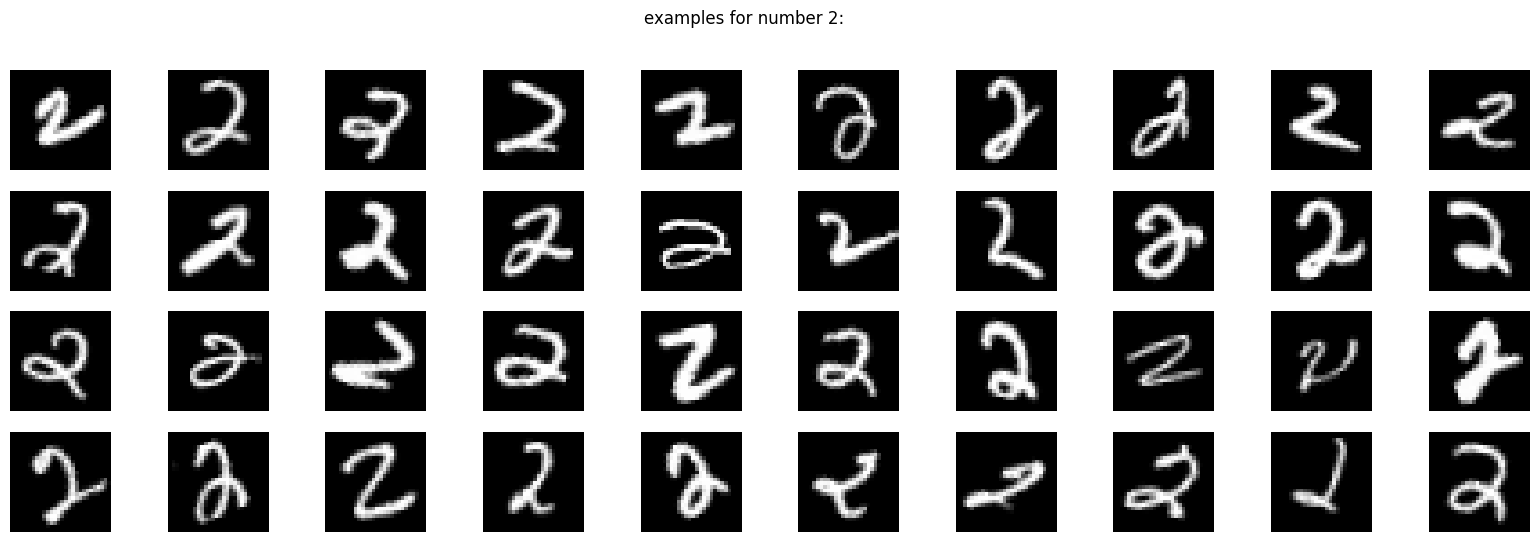

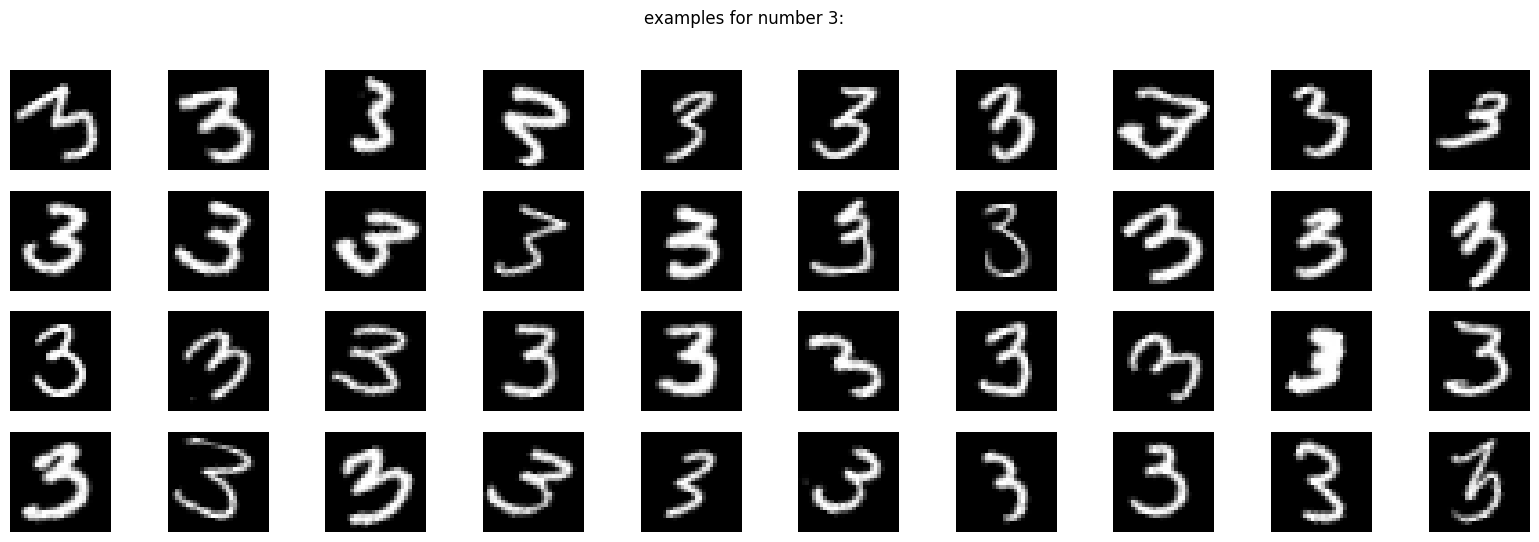

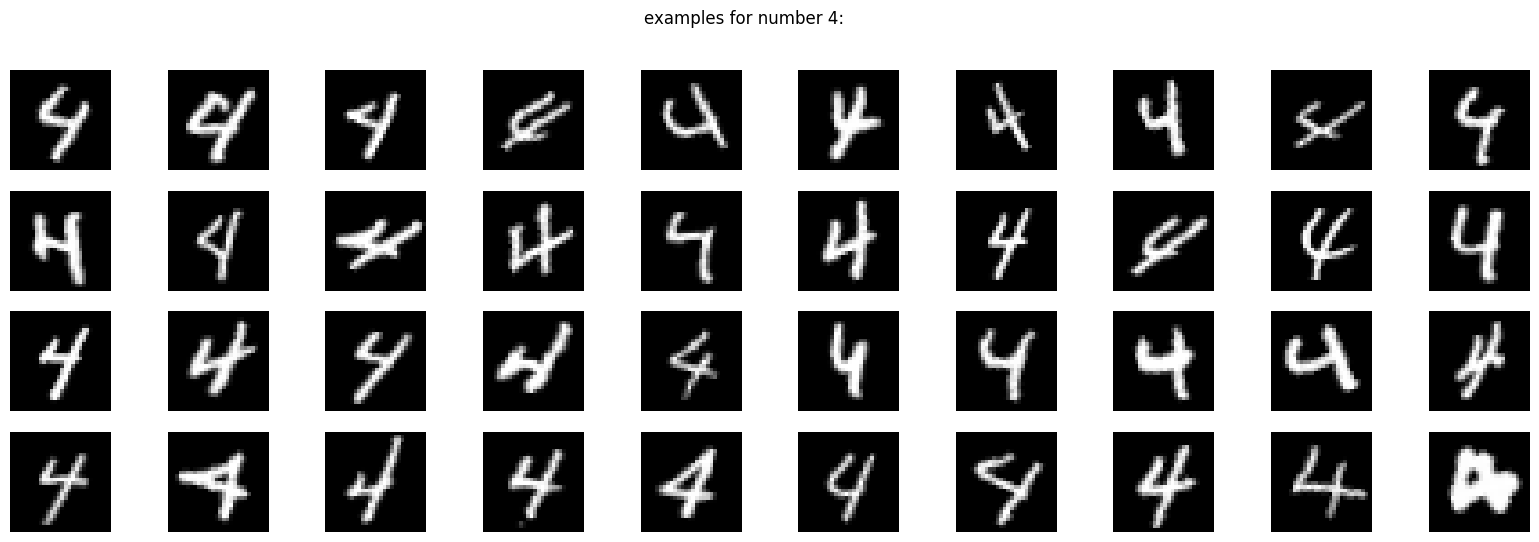

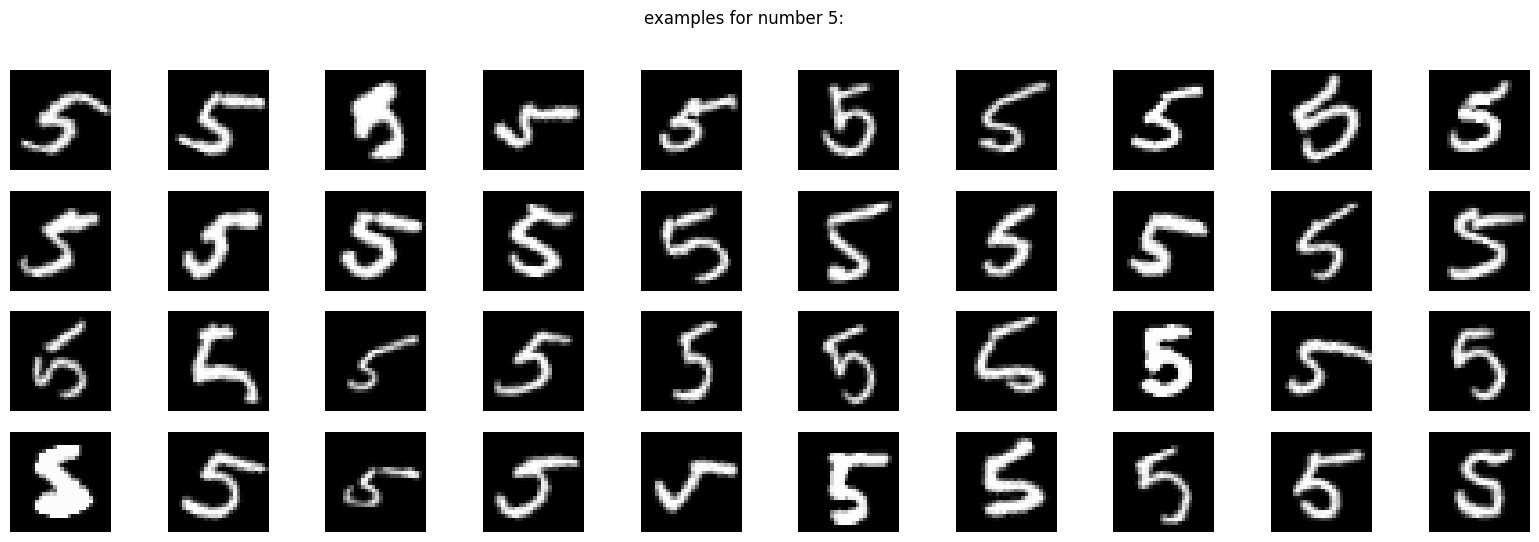

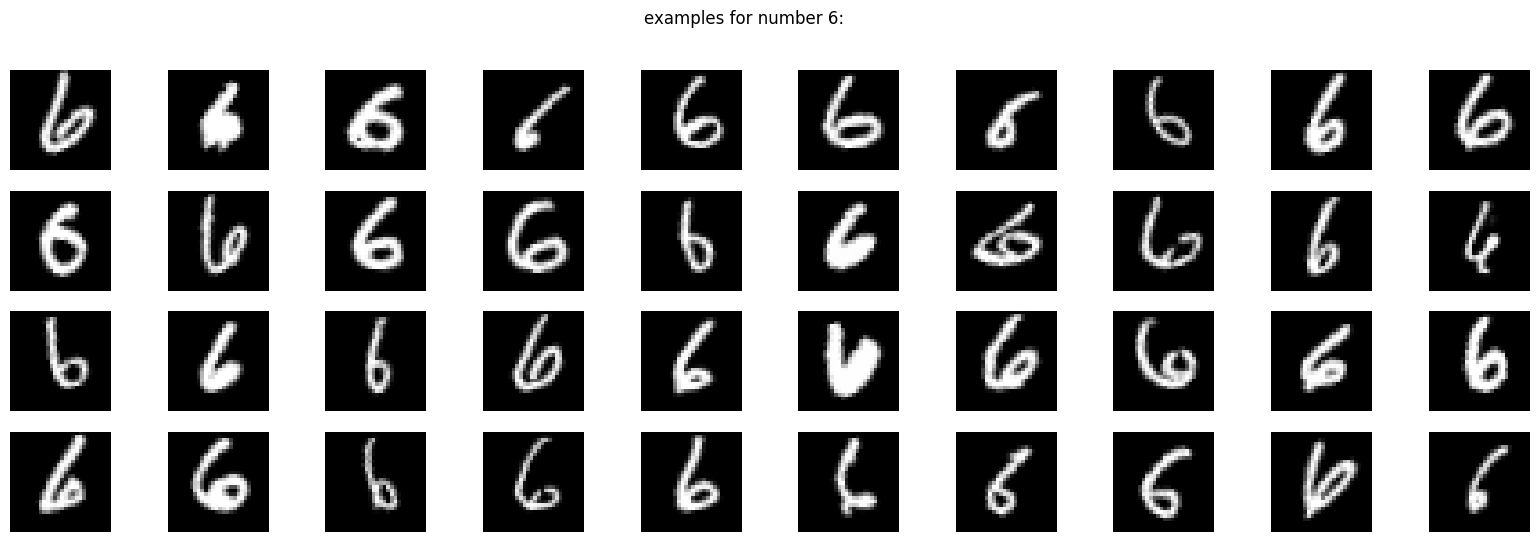

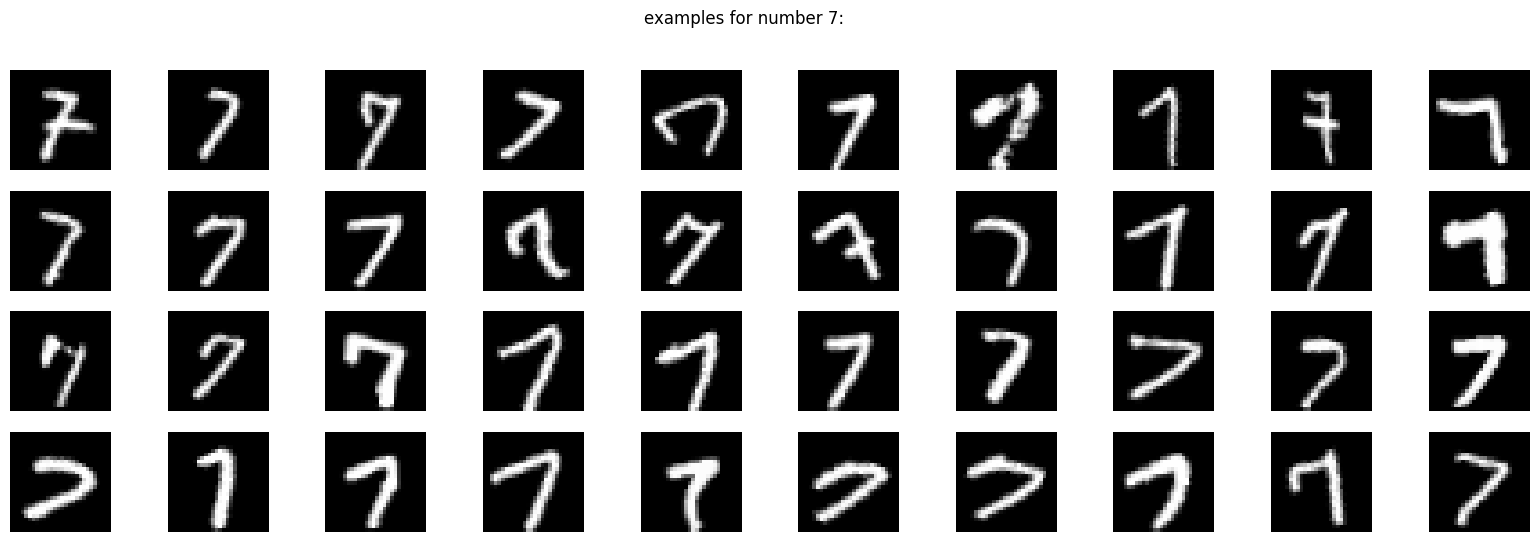

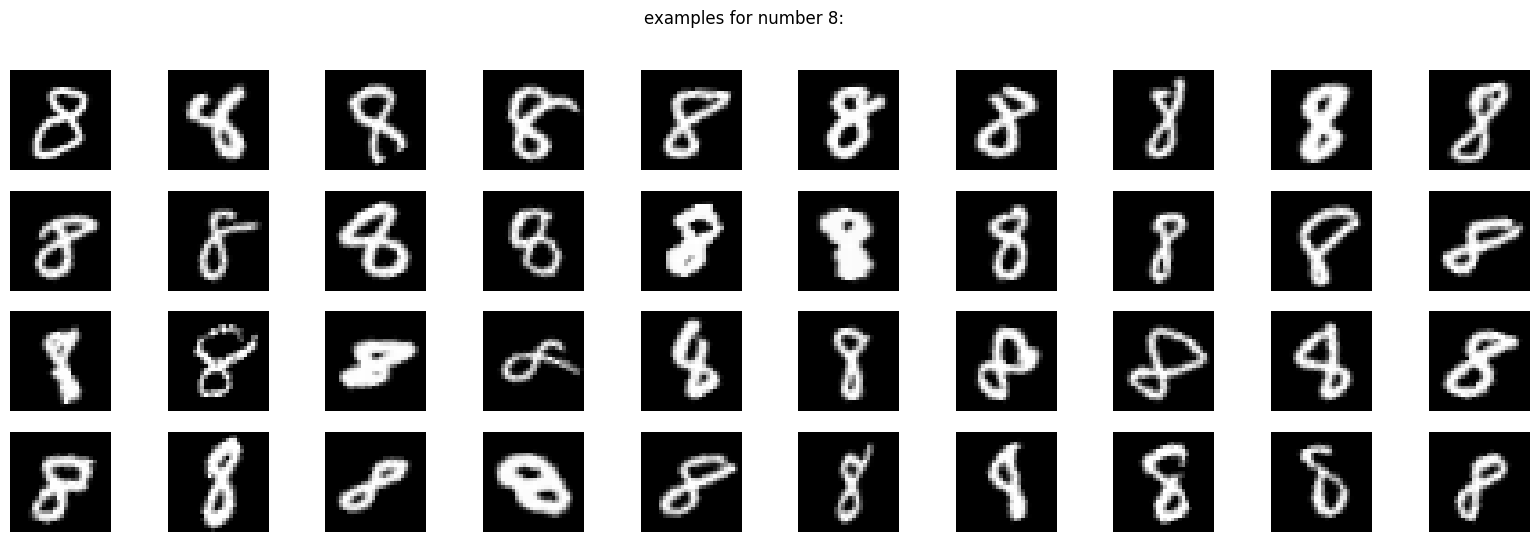

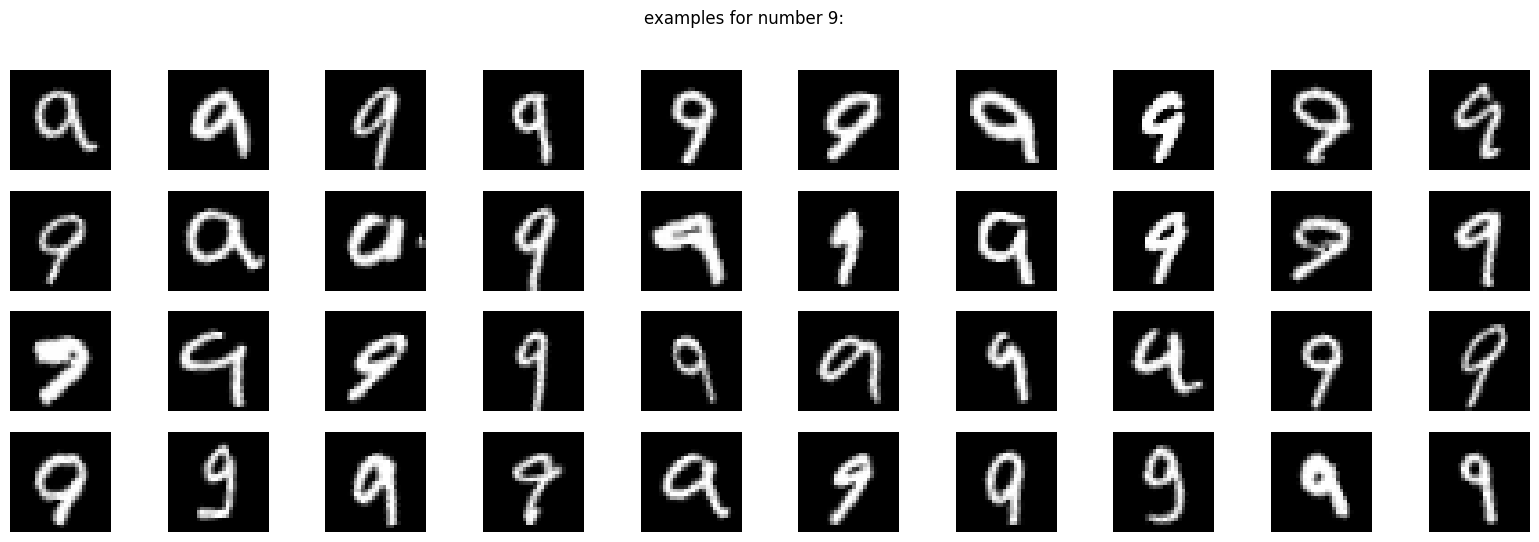

In [72]:
plot_samples(x_train_rotate,y_train)

In [73]:
model_drop_move.evaluate(x_train,y_train)
model_drop_move.evaluate(x_train_rotate,y_train)

1875/1875 [==============================] - 2s 952us/step - loss: 0.2201 - accuracy: 0.9355


[0.22009089589118958, 0.9355000257492065]

Finally include everything in the fit:

In [74]:
x_train_all = np.concatenate([x_train,x_train_moved_all,
                              x_train_rotate])
y_train_all = np.concatenate([y_train,y_train,y_train])
perm = np.random.permutation(len(x_train_all))

x_train_all = x_train_all[perm]
y_train_all = y_train_all[perm]

In [75]:
model_drop_full = create_simple_dropout_model()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_14 (Dense)            (None, 64)                131136    
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                      

In [76]:
model_drop_full.fit(x_train_all,y_train_all,
          batch_size=64,epochs=20,validation_split=0.2)

Epoch 1/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.5038 - accuracy: 0.8405 - val_loss: 0.1958 - val_accuracy: 0.9411
Epoch 2/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.2216 - accuracy: 0.9312 - val_loss: 0.1379 - val_accuracy: 0.9582
Epoch 3/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.1693 - accuracy: 0.9465 - val_loss: 0.1113 - val_accuracy: 0.9661
Epoch 4/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.1437 - accuracy: 0.9544 - val_loss: 0.0979 - val_accuracy: 0.9707
Epoch 5/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.1276 - accuracy: 0.9594 - val_loss: 0.0884 - val_accuracy: 0.9739
Epoch 6/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.1178 - accuracy: 0.9627 - val_loss: 0.0817 - val_accuracy: 0.9751
Epoch 7/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.1087 - accuracy: 0.9658 - val_loss: 0.0850 - val_ac

Now test on all our datasets:

In [77]:
model_drop_full.evaluate(x_train,y_train)
model_drop_full.evaluate(x_train_moved_x, y_train)
model_drop_full.evaluate(x_train_moved_y, y_train)
model_drop_full.evaluate(x_train_moved_all, y_train)
model_drop_full.evaluate(x_train_rotate,y_train)
model_drop_full.evaluate(x_test,y_test)

313/313 [==============================] - 0s 964us/step - loss: 0.0314 - accuracy: 0.9904


[0.03142683580517769, 0.9904000163078308]

In [78]:
model_drop_full.save('model_drop_full')

INFO:tensorflow:Assets written to: model_drop_full/assets


INFO:tensorflow:Assets written to: model_drop_full/assets


### 2.4 Comparison of all 4 models

Test our models (**note:** the models are not converged):

In [79]:
model2.evaluate(x_test,y_test)
model_drop.evaluate(x_test,y_test)
model_drop_move.evaluate(x_test,y_test)
model_drop_full.evaluate(x_test,y_test)

313/313 [==============================] - 0s 994us/step - loss: 0.0314 - accuracy: 0.9904


[0.03142683580517769, 0.9904000163078308]

Save all 4 Models

In [ ]:
model2.save('model2.h5',overwrite=True)
model_drop.save('model_drop.h5',overwrite=True)
model_drop_move.save('model_drop_move.h5',overwrite=True)
model_drop_full.save('model_drop_full.h5',overwrite=True)